# Trabajo Pr√°ctico: Exploraci√≥n y Preparaci√≥n de Airbnb Listings


## Objetivo
En esta libreta analizamos el dataset `listings_big.csv` para comprender su estructura, diagnosticar problemas de calidad y preparar un conjunto de features apto para estimar **qu√© tan alquilable es un listing**. El flujo general incluye:
- Exploraci√≥n inicial y resumen estad√≠stico
- An√°lisis de valores faltantes y patrones de disponibilidad
- Visualizaciones que permitan interpretar la ocupaci√≥n y sus drivers
- Definici√≥n de un problema supervisado de clasificaci√≥n enfocado en la alta ocupaci√≥n
- Construcci√≥n de un pipeline de preprocesamiento, ingenier√≠a de variables y selecci√≥n/reducci√≥n de dimensionalidad


# üè° Airbnb Listings Data Dictionary

> Diccionario de datos del conjunto de listados de Airbnb, con tipos de datos, campos calculados y descripciones.  
> Compatible con visualizaci√≥n en GitHub (scroll horizontal autom√°tico en tablas grandes).

---

<div style="overflow-x: auto;">

| **Field** | **Type** | **Calculated** | **Description** |
|------------|-----------|----------------|-----------------|
| id | integer |  | Airbnb's unique identifier for the listing |
| listing_url | text | ‚úÖ |  |
| scrape_id | bigint | ‚úÖ | Inside Airbnb "Scrape" this was part of |
| last_scraped | datetime | ‚úÖ | UTC. The date and time this listing was "scraped". |
| source | text |  | One of `"neighbourhood search"` or `"previous scrape"`. Describes how the listing was discovered. |
| name | text |  | Name of the listing |
| description | text |  | Detailed description of the listing |
| neighborhood_overview | text |  | Host's description of the neighbourhood |
| picture_url | text |  | URL to Airbnb-hosted regular-sized image |
| host_id | integer |  | Airbnb's unique identifier for the host/user |
| host_url | text | ‚úÖ | Airbnb page for the host |
| host_name | text |  | Name of the host (usually first name). |
| host_since | date |  | Host account creation date |
| host_location | text |  | Host's self-reported location |
| host_about | text |  | Description about the host |
| host_response_time | text |  |  |
| host_response_rate | text |  |  |
| host_acceptance_rate | text |  | Rate at which host accepts booking requests |
| host_is_superhost | boolean *(t=true; f=false)* |  |  |
| host_thumbnail_url | text |  |  |
| host_picture_url | text |  |  |
| host_neighbourhood | text |  |  |
| host_listings_count | text |  | Number of listings (Airbnb internal) |
| host_total_listings_count | text |  | Total listings (Airbnb internal) |
| host_verifications | text |  |  |
| host_has_profile_pic | boolean *(t=true; f=false)* |  |  |
| host_identity_verified | boolean *(t=true; f=false)* |  |  |
| neighbourhood | text |  |  |
| neighbourhood_cleansed | text | ‚úÖ | Geocoded neighbourhood (from shapefiles) |
| neighbourhood_group_cleansed | text | ‚úÖ | Geocoded neighbourhood group (from shapefiles) |
| latitude | numeric |  | WGS84 latitude |
| longitude | numeric |  | WGS84 longitude |
| property_type | text |  | Self-selected property type |
| room_type | text |  | One of:<br>‚Ä¢ **Entire home/apt** ‚Äî Whole space<br>‚Ä¢ **Private room** ‚Äî Own room, shared areas<br>‚Ä¢ **Shared room** ‚Äî Shared sleeping space |
| accommodates | integer |  | Max guest capacity |
| bathrooms | numeric |  | Number of bathrooms |
| bathrooms_text | string |  | Text description of bathrooms (legacy field) |
| bedrooms | integer |  | Number of bedrooms |
| beds | integer |  | Number of beds |
| amenities | json |  | JSON array of amenities |
| price | currency |  | Daily price (ignore `$` artifact) |
| minimum_nights | integer |  | Minimum nights allowed |
| maximum_nights | integer |  | Maximum nights allowed |
| minimum_minimum_nights | integer | ‚úÖ | Smallest min nights (calendar, 365 days ahead) |
| maximum_minimum_nights | integer | ‚úÖ | Largest min nights (calendar, 365 days ahead) |
| minimum_maximum_nights | integer | ‚úÖ | Smallest max nights (calendar, 365 days ahead) |
| maximum_maximum_nights | integer | ‚úÖ | Largest max nights (calendar, 365 days ahead) |
| minimum_nights_avg_ntm | numeric | ‚úÖ | Avg min nights (calendar, 365 days ahead) |
| maximum_nights_avg_ntm | numeric | ‚úÖ | Avg max nights (calendar, 365 days ahead) |
| calendar_updated | date |  |  |
| has_availability | boolean |  | *(t=true; f=false)* |
| availability_30 | integer | ‚úÖ | Available nights (next 30 days) |
| availability_60 | integer | ‚úÖ | Available nights (next 60 days) |
| availability_90 | integer | ‚úÖ | Available nights (next 90 days) |
| availability_365 | integer | ‚úÖ | Available nights (next 365 days) |
| calendar_last_scraped | date |  |  |
| number_of_reviews | integer |  | Total number of reviews |
| number_of_reviews_ltm | integer | ‚úÖ | Reviews in last 12 months |
| number_of_reviews_l30d | integer | ‚úÖ | Reviews in last 30 days |
| first_review | date | ‚úÖ | Date of first review |
| last_review | date | ‚úÖ | Date of most recent review |
| review_scores_rating | numeric |  |  |
| review_scores_accuracy | numeric |  |  |
| review_scores_cleanliness | numeric |  |  |
| review_scores_checkin | numeric |  |  |
| review_scores_communication | numeric |  |  |
| review_scores_location | numeric |  |  |
| review_scores_value | numeric |  |  |
| license | text |  | Licence/permit/registration number |
| instant_bookable | boolean |  | *(t=true; f=false)* ‚Äî Guests can book instantly |
| calculated_host_listings_count | integer | ‚úÖ | Number of listings host has in this scrape (city/region) |
| calculated_host_listings_count_entire_homes | integer | ‚úÖ | Entire homes owned by host |
| calculated_host_listings_count_private_rooms | integer | ‚úÖ | Private rooms owned by host |
| calculated_host_listings_count_shared_rooms | integer | ‚úÖ | Shared rooms owned by host |
| reviews_per_month | numeric | ‚úÖ | Average reviews per month over listing lifetime.<br><br>**Pseudocode/SQL:**<br>`IF scrape_date - first_review <= 30 THEN number_of_reviews`<br>`ELSE number_of_reviews / ((scrape_date - first_review + 1) / (365/12))` |

</div>

---

‚úÖ = Calculated field  
üìò *Boolean values*: `t=true`, `f=false`  
üåê *Coordinates*: WGS84 projection  
üí° *Source*: [Inside Airbnb](http://insideairbnb.com/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import ast
import re

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (8, 5)
pd.set_option('display.max_columns', 80)
pd.set_option("display.float_format", "{:.4f}".format)

DATA_PATH = Path('listings_big.csv')


## 1. Carga y saneamiento inicial


In [2]:
df_raw = pd.read_csv(
    DATA_PATH,
    na_values=("N/A", "NA", "na", "n/a", "", "-", ".","nan"),
    keep_default_na=True
)

df = df_raw.copy()
# Limpieza de precios: eliminar s√≠mbolos y convertir a num√©rico
df['price'] = (df['price']
               .astype(str)
               .str.replace(r'[‚Ç¨$¬£,]', '', regex=True)
               .str.strip())

df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Conversi√≥n de columnas fecha para posteriores features
date_columns = ['last_scraped', 'host_since', 'first_review', 'last_review']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['host_id'] = df['host_id'].astype('string')

print(f"Shape original: {df_raw.shape}")
print(f"Shape despu√©s de transformaciones b√°sicas: {df.shape}")


Shape original: (35172, 79)
Shape despu√©s de transformaciones b√°sicas: (35172, 79)


### 1.1 Informaci√≥n general del dataset


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            35172 non-null  int64         
 1   listing_url                                   35172 non-null  object        
 2   scrape_id                                     35172 non-null  int64         
 3   last_scraped                                  35172 non-null  datetime64[ns]
 4   source                                        35172 non-null  object        
 5   name                                          35172 non-null  object        
 6   description                                   34294 non-null  object        
 7   neighborhood_overview                         16585 non-null  object        
 8   picture_url                                   35171 non-null  obje

In [4]:
# Resumen de tipos de columnas y conteo por tipo
type_summary = df.dtypes.value_counts().rename('count').to_frame()
type_summary


count
object             30
int64              23
float64            21
datetime64[ns]      4
string[python]      1

In [5]:
# Estad√≠sticas descriptivas de variables num√©ricas
def format_numeric_summary(df, exclude_patterns=("id",), currency_cols=None, decimals=4):
    # excluir columnas que no tienen sentido estad√≠stico
    columns_to_exclude = [c for c in df.columns if any(pat in c.lower() for pat in exclude_patterns)]
    summary_num = (
        df.drop(columns=columns_to_exclude)
          .select_dtypes(include="number")
          .describe()
          .T
          .round(decimals)
    )

    # versi√≥n formateada
    summary_fmt = summary_num.copy().astype(object)

    # aplicar formato a las currency_cols
    if currency_cols:
        for col in currency_cols:
            if col in summary_fmt.index:
                summary_fmt.loc[col] = summary_num.loc[col].apply(lambda x: f"${x:,.{decimals}f}")

    return summary_num, summary_fmt

columns_to_exclude = ["id", "scrape_id", "host_id", "calendar_updated","neighbourhood_group_cleansed"]
currency_cols = ["price", "estimated_revenue_l365d"]

numeric_summary, numeric_summary_fmt = format_numeric_summary(
    df,
    exclude_patterns=columns_to_exclude,
    currency_cols=currency_cols,
    decimals=2
)

numeric_summary_fmt


count           mean  \
host_listings_count                           35166.0000        19.5400   
host_total_listings_count                     35166.0000        29.4300   
latitude                                      35172.0000       -34.5900   
longitude                                     35172.0000       -58.4200   
accommodates                                  35172.0000         2.9400   
bathrooms                                     31602.0000         1.2400   
bedrooms                                      34445.0000         1.1900   
beds                                          31604.0000         1.9100   
price                                         $31,598.00     $95,487.76   
minimum_nights                                35172.0000         6.1600   
maximum_nights                                35172.0000       414.1300   
minimum_minimum_nights                        35172.0000         5.6100   
maximum_minimum_nights                        35172.0000         6.3400   
minimum_maximum_nights                        35172.0000       603.8100   
maximum_maximum_nights                        35172.0000       619.6100   
minimum_nights_avg_ntm                        35172.0000         6.0200   
maximum_nights_avg_ntm                        35172.0000       611.2000   
availability_30                               35172.0000        14.7100   
availability_60                               35172.0000        33.2600   
availability_90                               35172.0000        54.5900   
availability_365                              35172.0000       206.6100   
number_of_reviews                             35172.0000        28.0300   
number_of_reviews_ltm                         35172.0000         9.5000   
number_of_reviews_l30d                        35172.0000         0.7100   
availability_eoy                              35172.0000       194.8600   
number_of_reviews_ly                          35172.0000         9.5900   
estimated_occupancy_l365d                     35172.0000        61.4300   
estimated_revenue_l365d                       $31,598.00  $3,491,273.15   
review_scores_rating                          29412.0000         4.7800   
review_scores_accuracy                        29411.0000         4.8100   
review_scores_cleanliness                     29412.0000         4.7400   
review_scores_checkin                         29412.0000         4.8700   
review_scores_communication                   29412.0000         4.8600   
review_scores_location                        29412.0000         4.8700   
review_scores_value                           29411.0000         4.7500   
calculated_host_listings_count                35172.0000        15.6500   
calculated_host_listings_count_entire_homes   35172.0000        15.0500   
calculated_host_listings_count_private_rooms  35172.0000         0.5300   
calculated_host_listings_count_shared_rooms   35172.0000         0.0400   
reviews_per_month                             29412.0000         1.3300   

                                                         std      min  \
host_listings_count                                  41.2900   1.0000   
host_total_listings_count                            79.5800   1.0000   
latitude                                              0.0200 -34.6900   
longitude                                             0.0300 -58.5300   
accommodates                                          1.5500   1.0000   
bathrooms                                             0.6600   0.0000   
bedrooms                                              0.9400   0.0000   
beds                                                  1.6000   0.0000   
price                                          $1,402,656.42  $260.00   
minimum_nights                                       26.0700   1.0000   
maximum_nights                                      651.0100   1.0000   
minimum_minimum_nights                               23.4400   1.0000   
maximum_minimum_nights    

In [6]:
# Estad√≠sticas b√°sicas de variables categ√≥ricas/cadenas
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
categorical_summary = df[categorical_cols].describe().T
categorical_summary_sorted = categorical_summary.sort_values("freq", ascending=False)

categorical_summary_sorted.head(20)


count unique  \
host_identity_verified  35166      2   
has_availability        34005      2   
host_has_profile_pic    35166      2   
room_type               35172      4   
source                  35172      2   
host_verifications      35166      7   
calendar_last_scraped   35172      4   
property_type           35172     66   
bathrooms_text          35148     48   
instant_bookable        35172      2   
host_response_rate      30943     73   
host_location           27619    742   
host_response_time      30943      4   
host_is_superhost       33071      2   
host_acceptance_rate    31460    100   
neighbourhood_cleansed  35172     48   
neighbourhood           16588    862   
host_neighbourhood      21721    232   
host_thumbnail_url      35166  16638   
host_picture_url        35166  16638   

                                                                      top  \
host_identity_verified                                                  t   
has_availability                                                        t   
host_has_profile_pic                                                    t   
room_type                                                 Entire home/apt   
source                                                        city scrape   
host_verifications                                     ['email', 'phone']   
calendar_last_scraped                                          2025-01-30   
property_type                                          Entire rental unit   
bathrooms_text                                                     1 bath   
instant_bookable                                                        f   
host_response_rate                                                   100%   
host_location                                     Buenos Aires, Argentina   
host_response_time                                         within an hour   
host_is_superhost                                                       f   
host_acceptance_rate                                                 100%   
neighbourhood_cleansed                                            Palermo   
neighbourhood                                     Buenos Aires, Argentina   
host_neighbourhood                                           Barrio Norte   
host_thumbnail_url      https://a0.muscache.com/defaults/user_pic-50x5...   
host_picture_url        https://a0.muscache.com/defaults/user_pic-225x...   

                         freq  
host_identity_verified  34159  
has_availability        33940  
host_has_profile_pic    33717  
room_type               32083  
source                  31613  
host_verifications      28522  
calendar_last_scraped   26254  
property_type           25470  
bathrooms_text          25236  
instant_bookable        24046  
host_response_rate      24043  
host_location           22667  
host_response_time      22499  
host_is_superhost       19320  
host_acceptance_rate    11976  
neighbourhood_cleansed  11410  
neighbourhood            6290  
host_neighbourhood       5748  
host_thumbnail_url       1449  
host_picture_url         1449


### 1.2 Exploraci√≥n de duplicados y consistencia


In [7]:
duplicate_count = df.duplicated(subset=['id']).sum()
print(f"Duplicados basados en 'id': {duplicate_count}")

missing_ids = df['id'].isna().sum()
print(f"IDs faltantes: {missing_ids}")


Duplicados basados en 'id': 0
IDs faltantes: 0


## 2. Valores faltantes


In [8]:
missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)


missing  percent
neighbourhood_group_cleansed    35172   1.0000
calendar_updated                35172   1.0000
license                         34783   0.9889
neighborhood_overview           18587   0.5285
neighbourhood                   18584   0.5284
host_about                      16360   0.4651
host_neighbourhood              13451   0.3824
host_location                    7553   0.2147
review_scores_value              5761   0.1638
review_scores_accuracy           5761   0.1638
review_scores_communication      5760   0.1638
review_scores_checkin            5760   0.1638
review_scores_cleanliness        5760   0.1638
review_scores_location           5760   0.1638
reviews_per_month                5760   0.1638
review_scores_rating             5760   0.1638
last_review                      5760   0.1638
first_review                     5760   0.1638
host_response_rate               4229   0.1202
host_response_time               4229   0.1202

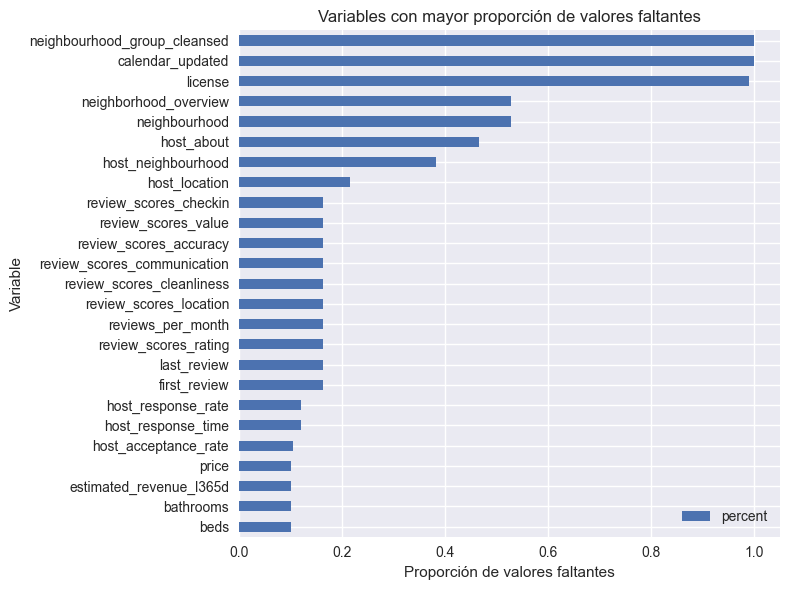

In [9]:
# Visualizaci√≥n del top de variables con mayor porcentaje de faltantes
top_missing = missing_table[missing_table['percent'] > 0].head(25)
ax = top_missing.sort_values('percent').plot.barh(y='percent', figsize=(8, 6))
ax.set_xlabel('Proporci√≥n de valores faltantes')
ax.set_ylabel('Variable')
ax.set_title('Variables con mayor proporci√≥n de valores faltantes')
plt.tight_layout()
plt.show()


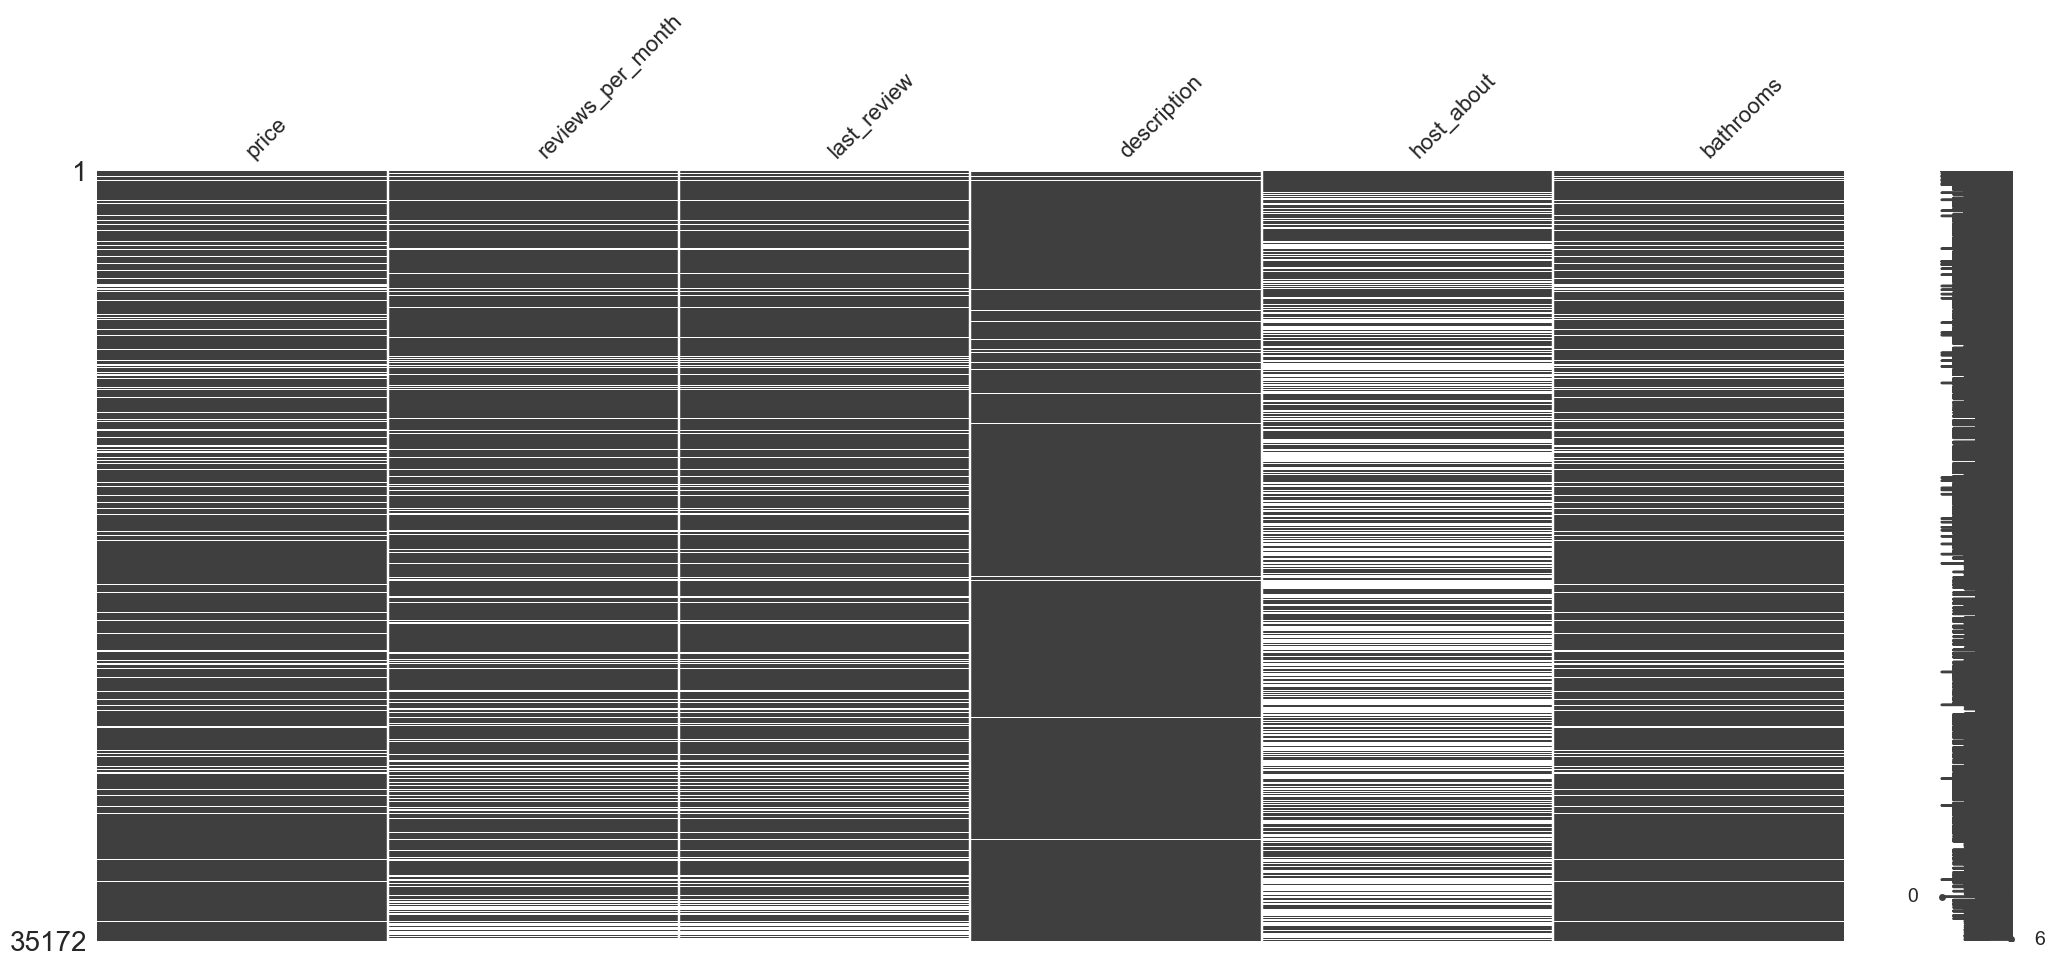

In [10]:
# Matriz de missingness para detectar patrones
try:
    import missingno as msno
    msno.matrix(df[['price', 'reviews_per_month', 'last_review', 'description', 'host_about', 'bathrooms']])
    plt.show()
except ImportError:
    print('missingno no est√° disponible en el entorno actual.')


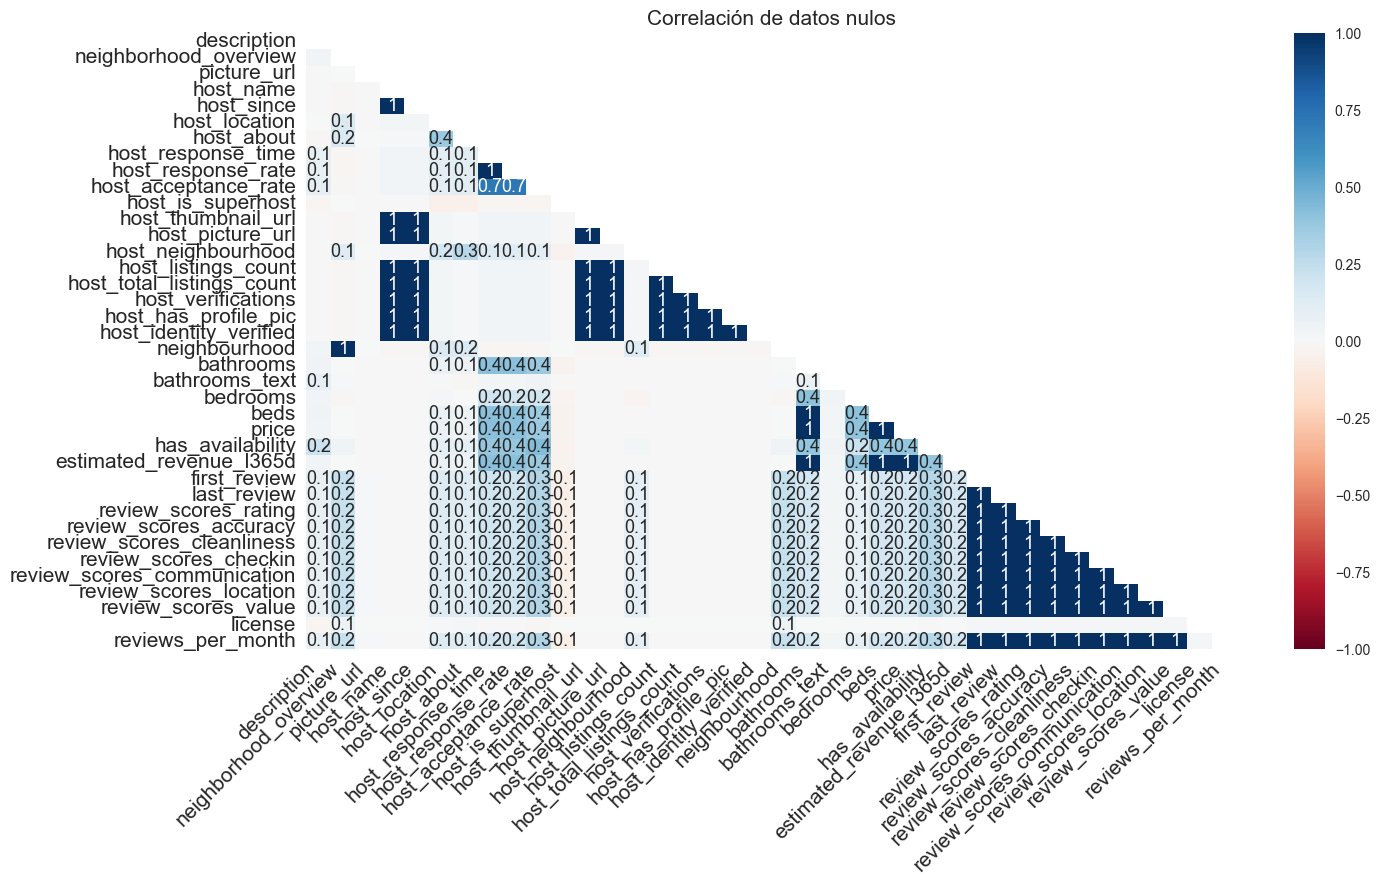

In [11]:
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlaci√≥n de datos nulos", fontsize=15)
plt.show()

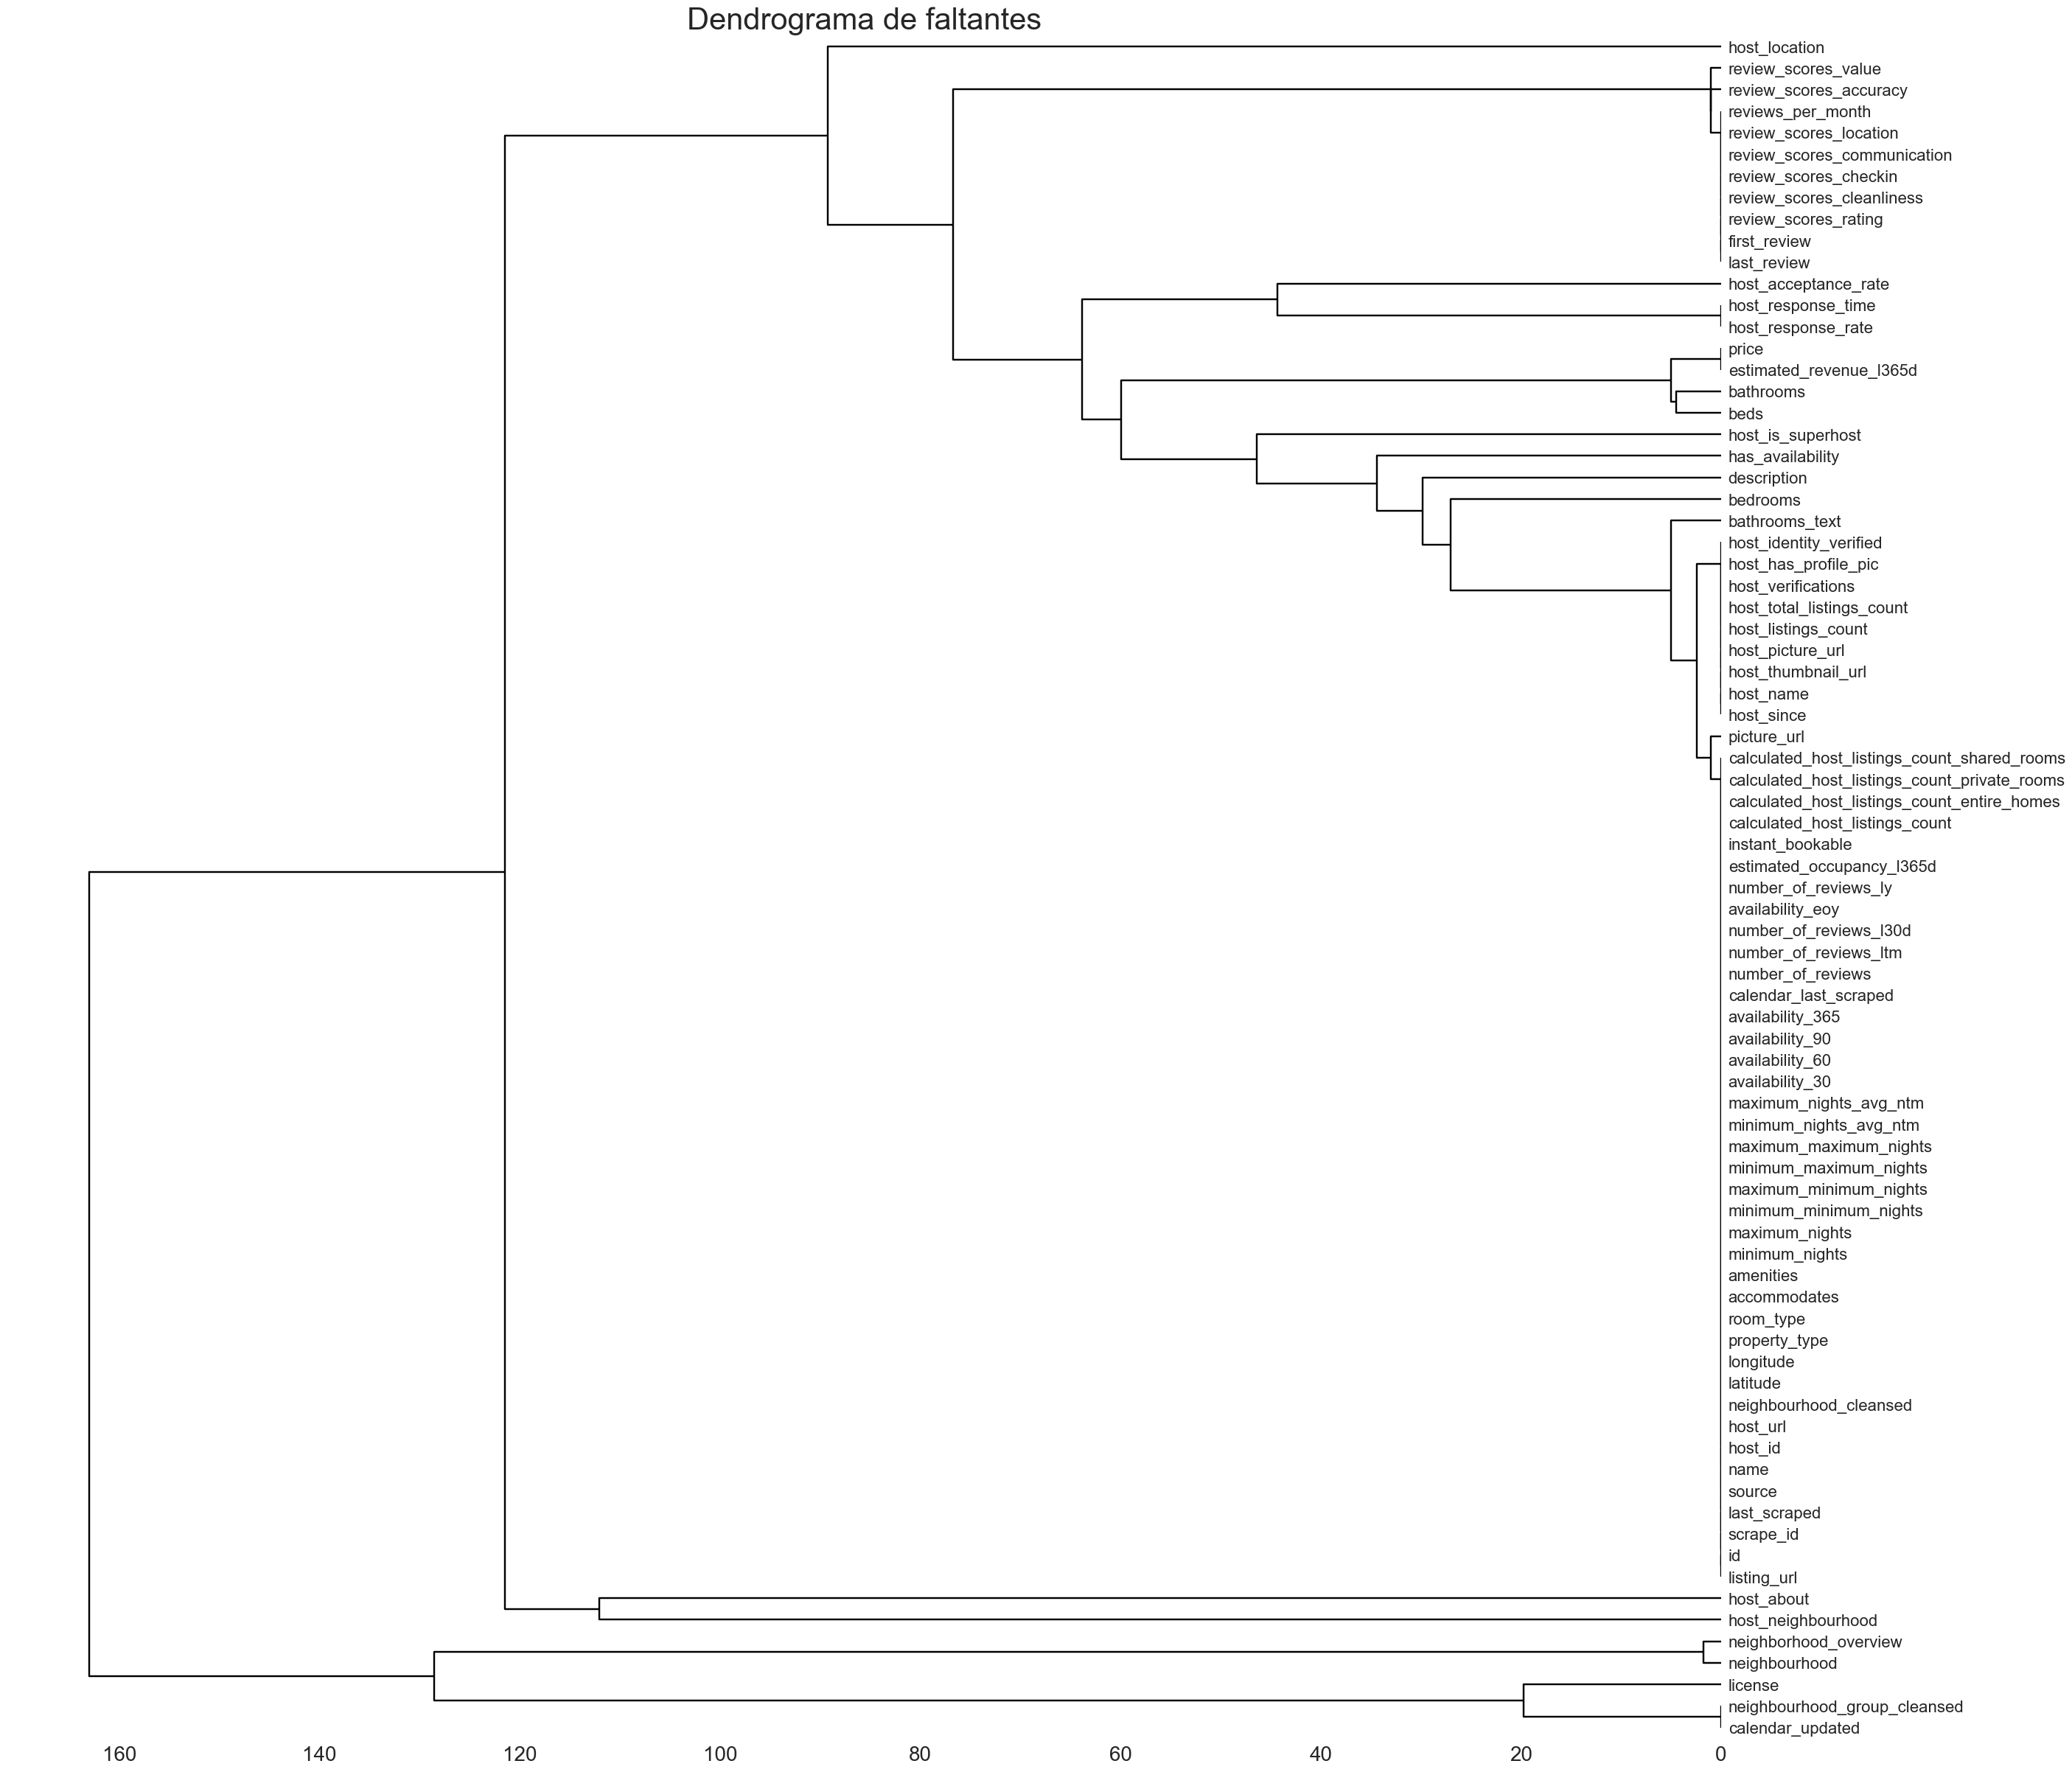

In [12]:
msno.dendrogram(df, figsize=(30,30))
plt.title('Dendrograma de faltantes', fontsize=30)
plt.show()

De aca podemos llegar a la conclusion de que

Las tres columnas con mas nulos son calendar_updated, neighbourhood_group_cleansed y license. Vemos que tienen relacion entre ellas, pero que con el resto de los datos no hay practicamente relacion.

In [13]:


# Helpers para detectar nulos SIN modificar el DataFrame 
NULL_TOKENS = {"", " ", "nan", "NaN", "null", "Null", "NULL", "none", "None", "NONE"}

def missing_mask(series: pd.Series) -> pd.Series:
    """True cuando el valor debe considerarse nulo (NaN real o string vac√≠o)."""
    base_mask = series.isna()
    string_mask = series.astype(str).str.strip().isin(NULL_TOKENS)
    return base_mask | string_mask

# Construcci√≥n de features de referencia 
def build_numeric_features(df: pd.DataFrame, min_valid_frac: float = 0.50) -> dict:
    numeric_features = {}
    for col in df.columns:
        series = df[col]
        cleaned = (
            series.astype(str)
                  .str.replace(r"[^\d\.\-]", "", regex=True)
                  .replace("", pd.NA)
        )
        numeric = pd.to_numeric(cleaned, errors="coerce")
        if numeric.notna().mean() >= min_valid_frac:
            numeric_features[col] = numeric
    return numeric_features

def build_categorical_features(df: pd.DataFrame, max_cardinality: int = 30) -> dict:
    categorical_features = {}
    for col in df.columns:
        series = df[col]
        if series.dtype == "O" or series.dtype == "bool":
            if 1 <= series.dropna().nunique() <= max_cardinality:
                categorical_features[col] = series.fillna("Missing")
    return categorical_features

numeric_features = build_numeric_features(df)
categorical_features = build_categorical_features(df)

# Medidas de asociaci√≥n entre patr√≥n de nulos y otras columnas 
def numeric_effect(nan_mask: pd.Series, series: pd.Series):
    available = series.notna()
    if available.sum() == 0:
        return None
    miss = nan_mask & available
    present = (~nan_mask) & available
    if miss.sum() == 0 or present.sum() == 0:
        return None
    diff = series[miss].mean() - series[present].mean()
    std = series[available].std()
    if pd.isna(std) or std == 0:
        return None
    return abs(diff) / std  # diferencia estandarizada

def categorical_effect(nan_mask: pd.Series, series: pd.Series):
    miss = nan_mask
    present = ~nan_mask
    if miss.sum() == 0 or present.sum() == 0:
        return None
    freq_miss = series[miss].value_counts(normalize=True)
    freq_present = series[present].value_counts(normalize=True)
    combined = pd.concat([freq_miss, freq_present], axis=1, keys=["missing", "present"]).fillna(0)
    combined["diff"] = (combined["missing"] - combined["present"]).abs()
    return combined["diff"].max()

# Clasificaci√≥n MCAR / MAR / MNAR / Estructural 
missing_counts = {col: missing_mask(df[col]).sum() for col in df.columns}
missing_pct = {col: round(count / len(df) * 100, 2) for col, count in missing_counts.items()}
missing_summary = (
    pd.DataFrame({"missing": missing_counts, "missing_pct": missing_pct})
      .query("missing > 0")
      .sort_values("missing_pct", ascending=False)
)

results = []
row_count = len(df)

for col in missing_summary.index:
    mask = missing_mask(df[col])

    if missing_summary.loc[col, "missing"] == row_count:
        results.append({
            "column": col,
            "missing": missing_summary.loc[col, "missing"],
            "missing_pct": missing_summary.loc[col, "missing_pct"],
            "category": "Estructural",
            "driver": None,
            "effect_size": None,
            "notes": "100% ausente en el scrape; indicio de campo no disponible en la fuente."
        })
        continue

    best_effect = 0
    best_driver = None
    best_type = None

    for driver, series in numeric_features.items():
        if driver == col:
            continue
        effect = numeric_effect(mask, series)
        if effect is not None and effect > best_effect:
            best_effect = effect
            best_driver = driver
            best_type = "num√©rico"

    for driver, series in categorical_features.items():
        if driver == col:
            continue
        effect = categorical_effect(mask, series)
        if effect is not None and effect > best_effect:
            best_effect = effect
            best_driver = f"{driver} (categor√≠a)"
            best_type = "categ√≥rico"

    if best_effect < 0.05 or best_driver is None:
        category = "MCAR"
        notes = "No se detectan asociaciones significativas con variables observadas."
    else:
        if missing_summary.get("missing_pct", pd.Series()).get(best_driver.replace(" (categor√≠a)", ""), 0) < 50:
            category = "MAR"
            notes = f"Patr√≥n de ausencias relacionado con {best_driver}; efecto {best_effect:.2f} ({best_type})."
        else:
            category = "MNAR"
            notes = (
                f"Hay asociaci√≥n (efecto {best_effect:.2f}) pero el driver tambi√©n est√° muy incompleto "
                "o depende de factores no observados; se clasifica como MNAR."
            )

    results.append({
        "column": col,
        "missing": missing_summary.loc[col, "missing"],
        "missing_pct": missing_summary.loc[col, "missing_pct"],
        "category": category,
        "driver": best_driver,
        "effect_size": round(best_effect, 3) if best_effect is not None else None,
        "notes": notes
    })

missing_classification = pd.DataFrame(results).sort_values(["category", "missing_pct"], ascending=False)
missing_classification


column  missing  missing_pct     category  \
2                        license    34783      98.8900          MAR   
3          neighborhood_overview    18587      52.8500          MAR   
4                  neighbourhood    18584      52.8400          MAR   
5                     host_about    16372      46.5500          MAR   
6             host_neighbourhood    13451      38.2400          MAR   
7                  host_location     7553      21.4700          MAR   
8         review_scores_location     5760      16.3800          MAR   
9    review_scores_communication     5760      16.3800          MAR   
10     review_scores_cleanliness     5760      16.3800          MAR   
11        review_scores_accuracy     5761      16.3800          MAR   
12          review_scores_rating     5760      16.3800          MAR   
13                   last_review     5760      16.3800          MAR   
14                  first_review     5760      16.3800          MAR   
15           review_scores_value     5761      16.3800          MAR   
16         review_scores_checkin     5760      16.3800          MAR   
17             reviews_per_month     5760      16.3800          MAR   
18            host_response_time     4229      12.0200          MAR   
19            host_response_rate     4229      12.0200          MAR   
20          host_acceptance_rate     3712      10.5500          MAR   
21                         price     3574      10.1600          MAR   
22       estimated_revenue_l365d     3574      10.1600          MAR   
23                     bathrooms     3570      10.1500          MAR   
24                          beds     3568      10.1400          MAR   
25             host_is_superhost     2101       5.9700          MAR   
26              has_availability     1167       3.3200          MAR   
27                   description      878       2.5000          MAR   
28                      bedrooms      727       2.0700          MAR   
29                bathrooms_text       24       0.0700          MAR   
30                     host_name        6       0.0200          MAR   
31                    host_since        6       0.0200          MAR   
32        host_identity_verified        6       0.0200          MAR   
33            host_thumbnail_url        6       0.0200          MAR   
34              host_picture_url        6       0.0200          MAR   
35          host_has_profile_pic        6       0.0200          MAR   
36     host_total_listings_count        6       0.0200          MAR   
37            host_verifications        6       0.0200          MAR   
38           host_listings_count        6       0.0200          MAR   
39                   picture_url        1       0.0000          MAR   
0   neighbourhood_group_cleansed    35172     100.0000  Estructural   
1               calendar_updated    35172     100.0000  Estructural   

                            driver  effect_size  \
2                               id       0.9990   
3                               id       0.8110   
4                               id       0.8110   
5                          host_id       0.6770   
6                          host_id       0.6480   
7                          host_id       1.0280   
8             host_acceptance_rate       1.0790   
9             host_acceptance_rate       1.0790   
10            host_acceptance_rate       1.0790   
11       review_scores_cleanliness       9.7900   
12            host_acceptance_rate       1.0790   
13            host_acceptance_rate       1.0790   
14            host_acceptance_rate       1.0790   
15            host_acceptance_rate       1.0790   
16            host_acceptance_rate       1.0790   
17            host_acceptance_rate       1.0790   
18                availability_eoy       0.8030   
19  host_response_time (categor√≠a)       1.0000   
20              host_response_rate       0.9590   
21                availability_eoy       1.5330   
22                availability_eoy       1

**Interpretaci√≥n inicial:** La ausencia de `reviews_per_month` suele darse en listados sin rese√±as recientes, sugiriendo un mecanismo MAR (dependiente de `number_of_reviews`).


## 2.1 Tratamiento de nulos

### 2.1.1 Las columnas

- neighbourhood_group_cleansed (100% nulos)
- calendar_updated (100% nulos)
- license (99% nulos)

las eliminamos

In [14]:
df = df.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated','license'] )

### 2.1.2 La columna booleanas

- Si has_availability es nula, la completamos con yes si la suma de availability_30, availability_60, availability_90 y availability_365 es distinta de cero y con no si la suma es igual a cero
- Si host_is_superhost no esta definida, significa que puede ser un listing nuevo que aun no fue evaluado por airbnb para ver si califica o no, con lo cual es importante diferenciar de un no. Para eso a los nulos le ponemos no, pero creamos una nueva columna llamada was_evaluated_for_superhost para diferenciarlos de los ya evaluados

In [15]:
cols_sumar = ['availability_30','availability_60', 'availability_90', 'availability_365']

df.loc[
    (df[cols_sumar].sum(axis=1) != 0) & (df['has_availability'].isna()),
    'has_availability'
] = 't'

df.loc[
    (df[cols_sumar].sum(axis=1) == 0) & (df['has_availability'].isna()),
    'has_availability'
] = 'f'

for col in ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']:
    if col in df.columns:
        df[col] = df[col].replace({'t': 'yes', 'f': 'no'})

# is_superhost

df['was_evaluated_for_superhost'] = ~df['host_is_superhost'].isna()
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 'yes', 'f': 'no'}).fillna('no')

print(df['host_is_superhost'].unique())

print(df['was_evaluated_for_superhost'].unique())


['yes' 'no']
[ True False]


### 2.1.2 Las columnas neighbourhood (52% nulos), neighbourhood_overview (52% nulos), host_location (46% nulos) y host_about (46% nulos)

- La columna neighbourhood completamos con la del valor codificado neighbourhood_cleansed que es el valor ya codificado de la ubicacion
- La columna neighbourhood_overview le asignamos la clasificacion "not defined"
- La columna host_location y host_about le asignamos la clasificacion "not defined"


In [16]:
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood_cleansed'])

cols = ['neighborhood_overview', 'host_location', 'host_about','host_neighbourhood']

for col in cols:
    df[col] = (
        df[col]
            .astype('string')                         # convierte a string (dtype nativo)
            .replace(r'^\s*$', pd.NA, regex=True)     # "" o espacios ‚Üí NA
            .fillna('not-defined')                    # completa NA
    )

missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct*100})
missing_table[missing_table["missing"]>0].head(79)


missing  percent
review_scores_accuracy          5761  16.3800
review_scores_value             5761  16.3800
last_review                     5760  16.3800
reviews_per_month               5760  16.3800
review_scores_cleanliness       5760  16.3800
review_scores_checkin           5760  16.3800
first_review                    5760  16.3800
review_scores_rating            5760  16.3800
review_scores_location          5760  16.3800
review_scores_communication     5760  16.3800
host_response_rate              4229  12.0200
host_response_time              4229  12.0200
host_acceptance_rate            3712  10.5500
price                           3574  10.1600
estimated_revenue_l365d         3574  10.1600
bathrooms                       3570  10.1500
beds                            3568  10.1400
description                      878   2.5000
bedrooms                         727   2.0700
bathrooms_text                    24   0.0700
host_total_listings_count          6   0.0200
host_identity_verified             6   0.0200
host_has_profile_pic               6   0.0200
host_verifications                 6   0.0200
host_listings_count                6   0.0200
host_picture_url                   6   0.0200
host_since                         6   0.0200
host_name                          6   0.0200
host_thumbnail_url                 6   0.0200
picture_url                        1   0.0000

### 2.1.2 Las columnas neighbourhood (52% nulos), neighbourhood_overview (52% nulos), host_location (46% nulos) y host_about (46% nulos)

Podemos observar que el porcentaje de nulos de las columnas asociadas a las reviews es el mismo (16.7%) y coincide con que no hay ni fecha de first_review ni fecha de last_review, esto nos muestra que posiblemente esos listings aun no tengan ninguna review asociada, con lo cual tiene sentido que sean nulos las reviews por aspecto del alojamiento. Lo que vamos a hacer es asignarle un cero pero ademas vamos a crear una nueva columna que indique si el listing tiene reviews o no.

- review_scores_accuracy	    4725	16.7600
- review_scores_value	        4725	16.7600
- reviews_per_month	            4724	16.7600
- first_review	                4724	16.7600
- last_review	                4724	16.7600
- review_scores_rating	        4724	16.7600
- review_scores_location	    4724	16.7600
- review_scores_communication	4724	16.7600
- review_scores_checkin	        4724	16.7600
- review_scores_cleanliness	    4724	16.7600


In [17]:
cols_scores = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'review_scores_rating'
]

# 1) Definir fecha de referencia para calcular la  cantidad de dias desde la ultima review en base al maximo

reference_date = max(df['first_review'].max(), df['last_review'].max())

print("Fecha de referencia:", reference_date)

for c in cols_scores:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 2) Flag "tiene reviews"

has_num_reviews = df['number_of_reviews'] > 0 if 'number_of_reviews' in df.columns else False
has_first = df['first_review'].notna() if 'first_review' in df.columns else False
has_last  = df['last_review'].notna()  if 'last_review'  in df.columns else False
has_rpm   = (df['reviews_per_month'].fillna(0) > 0) if 'reviews_per_month' in df.columns else False

df['has_reviews'] = (has_num_reviews | has_first | has_last | has_rpm).astype(bool)

# 3) Poner 0 en scores solo cuando no hay reviews
df.loc[~df['has_reviews'], [c for c in cols_scores if c in df.columns]] = 0

# 3) Crear d√≠as desde primera review
df['days_since_first_review'] = np.where(
    df['has_reviews'] == 1,
    (reference_date - df['first_review']).dt.days,
    -1  # -1 indica que no tiene reviews
)

# 4) Crear d√≠as desde √∫ltima review
df['days_since_last_review'] = np.where(
    df['has_reviews'] == 1,
    (reference_date - df['last_review']).dt.days,
    -1
)

if 'reviews_per_month' in df.columns:
    df.loc[~df['has_reviews'] & df['reviews_per_month'].isna(), 'reviews_per_month'] = 0.0

df.drop(columns=['first_review', 'last_review'], inplace=True)

missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct*100})
missing_table[missing_table["missing"]>0].head(79)

Fecha de referencia: 2025-01-30 00:00:00


missing  percent
host_response_rate            4229  12.0200
host_response_time            4229  12.0200
host_acceptance_rate          3712  10.5500
price                         3574  10.1600
estimated_revenue_l365d       3574  10.1600
bathrooms                     3570  10.1500
beds                          3568  10.1400
description                    878   2.5000
bedrooms                       727   2.0700
bathrooms_text                  24   0.0700
host_identity_verified           6   0.0200
host_has_profile_pic             6   0.0200
host_total_listings_count        6   0.0200
host_listings_count              6   0.0200
host_picture_url                 6   0.0200
host_thumbnail_url               6   0.0200
host_verifications               6   0.0200
host_since                       6   0.0200
host_name                        6   0.0200
picture_url                      1   0.0000
review_scores_value              1   0.0000
review_scores_accuracy           1   0.0000

### 2.1.3 Chequeo de nulos antes del split

Nulos previos al split con pre procesamiento de nulos

In [18]:
missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)


missing  percent
host_response_rate            4229   0.1202
host_response_time            4229   0.1202
host_acceptance_rate          3712   0.1055
price                         3574   0.1016
estimated_revenue_l365d       3574   0.1016
bathrooms                     3570   0.1015
beds                          3568   0.1014
description                    878   0.0250
bedrooms                       727   0.0207
bathrooms_text                  24   0.0007
host_identity_verified           6   0.0002
host_has_profile_pic             6   0.0002
host_total_listings_count        6   0.0002
host_listings_count              6   0.0002
host_picture_url                 6   0.0002
host_thumbnail_url               6   0.0002
host_verifications               6   0.0002
host_since                       6   0.0002
host_name                        6   0.0002
picture_url                      1   0.0000

### 2.1.4 Split del dataset

Tenemos en cuenta de que todos los listing del mismo host no queden divididos
Spliteamos en este punto para evitar dataleakage

In [19]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=df['host_id']))

df_train = df.iloc[train_idx].copy()
df_test  = df.iloc[test_idx].copy()

# sanity check: no hay host_id compartidos
assert set(df_train.host_id) & set(df_test.host_id) == set()

print(df.shape, df_test.shape, df_train.shape)

(35172, 78) (6988, 78) (28184, 78)


## 3. Distribuciones y visualizaciones clave


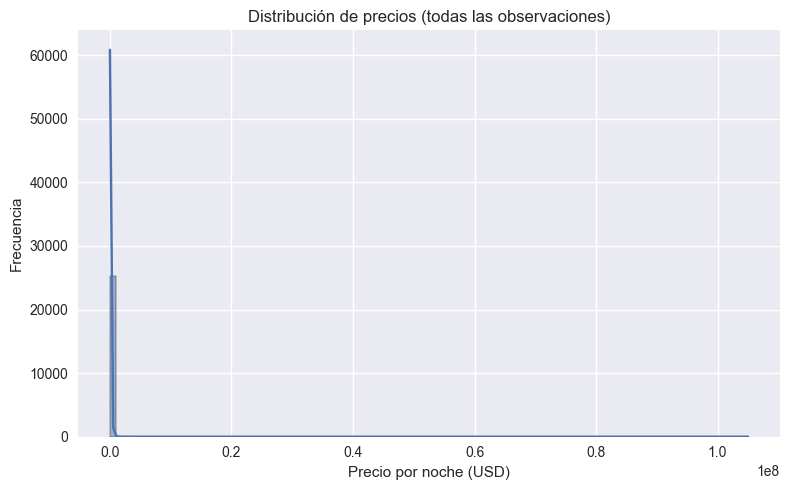

In [20]:
sns.histplot(df_train['price'].dropna(), bins=100, kde=True)
plt.title('Distribuci√≥n de precios (todas las observaciones)')
plt.xlabel('Precio por noche (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


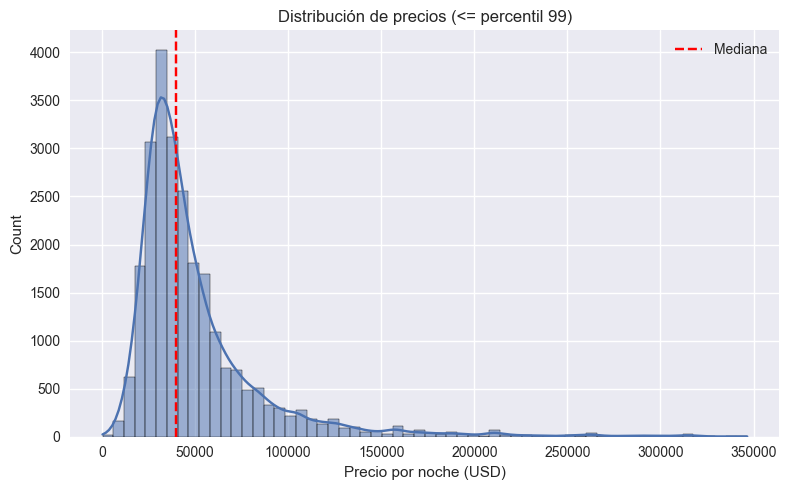

In [21]:
# Distribuci√≥n recortando el 1% superior para atenuar outliers
price_cap = df_train['price'].quantile(0.99)
sns.histplot(df_train.loc[df['price'] <= price_cap, 'price'], bins=60, kde=True)
plt.axvline(df_train['price'].median(), color='red', linestyle='--', label='Mediana')
plt.title('Distribuci√≥n de precios (<= percentil 99)')
plt.xlabel('Precio por noche (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Skewness de precios para evaluar la asimetr√≠a
price_series = df_train['price'].dropna()
price_skew = price_series.skew()
positive_prices = price_series[price_series > 0]
price_log_skew = np.log1p(positive_prices).skew() if not positive_prices.empty else np.nan
print(f'Skewness (precio bruto): {price_skew:.3f}')
print(f'Skewness (log1p del precio): {price_log_skew:.3f}')


Skewness (precio bruto): 52.733
Skewness (log1p del precio): 1.780


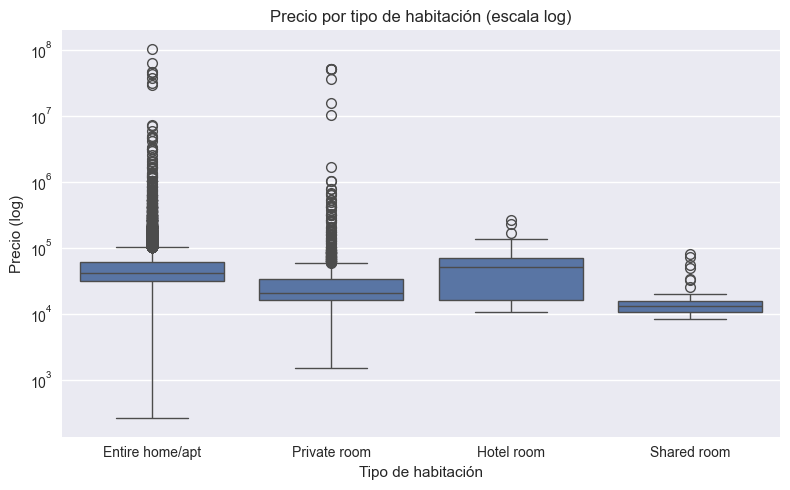

In [23]:
sns.boxplot(data=df_train, x='room_type', y='price')
plt.yscale('log')
plt.title('Precio por tipo de habitaci√≥n (escala log)')
plt.xlabel('Tipo de habitaci√≥n')
plt.ylabel('Precio (log)')
plt.tight_layout()
plt.show()


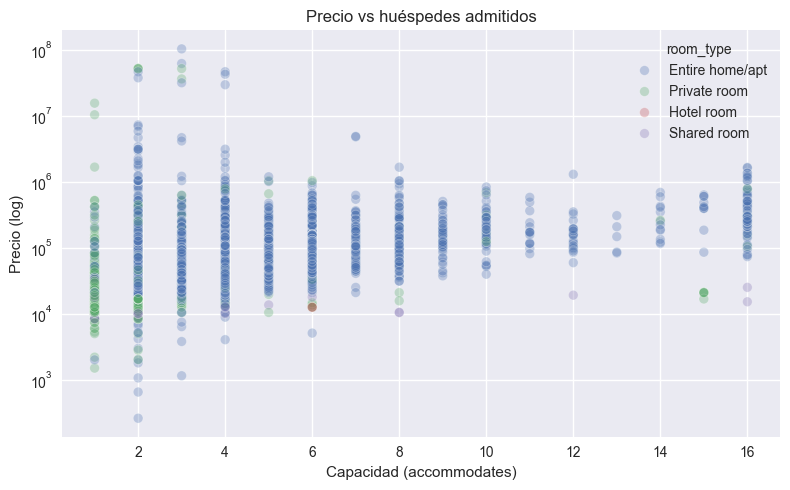

In [24]:
# Precio vs capacidad
sns.scatterplot(data=df_train, x='accommodates', y='price', hue='room_type', alpha=0.3)
plt.yscale('log')
plt.title('Precio vs hu√©spedes admitidos')
plt.xlabel('Capacidad (accommodates)')
plt.ylabel('Precio (log)')
plt.tight_layout()
plt.show()


### Distribuciones de disponibilidad y ocupaci√≥n


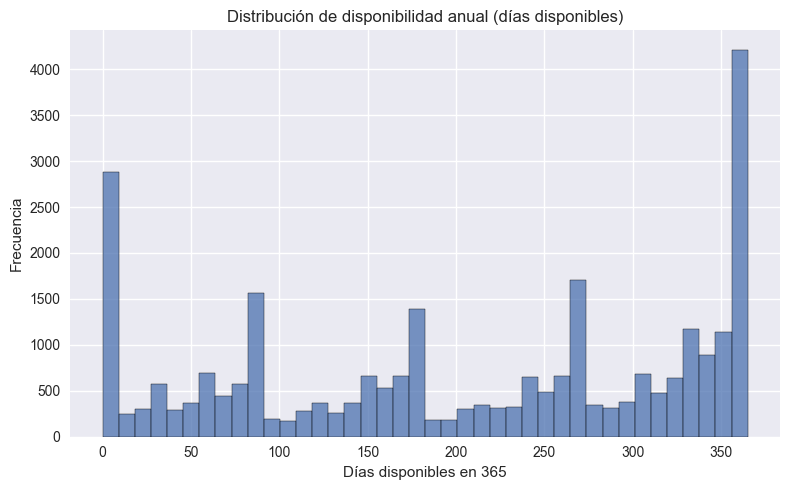

In [25]:
sns.histplot(df_train['availability_365'], bins=40, kde=False)
plt.title('Distribuci√≥n de disponibilidad anual (d√≠as disponibles)')
plt.xlabel('D√≠as disponibles en 365')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


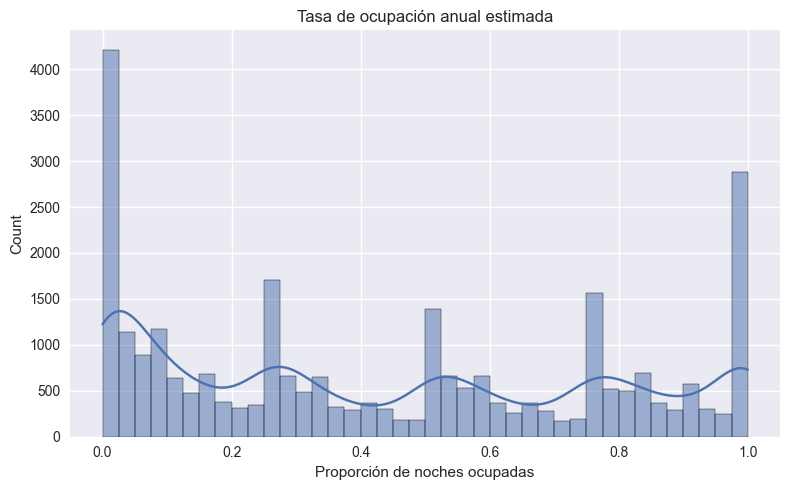

In [26]:
sns.histplot(1 - (df_train['availability_365'] / 365), bins=40, kde=True)
plt.title('Tasa de ocupaci√≥n anual estimada')
plt.xlabel('Proporci√≥n de noches ocupadas')
plt.tight_layout()
plt.show()


### Correlaci√≥n orientada a disponibilidad (categ√≥ricas codificadas)
Para estudiar los drivers de disponibilidad aplicamos one-hot encoding sobre las variables categ√≥ricas y analizamos la correlaci√≥n con las tasas de ocupaci√≥n.


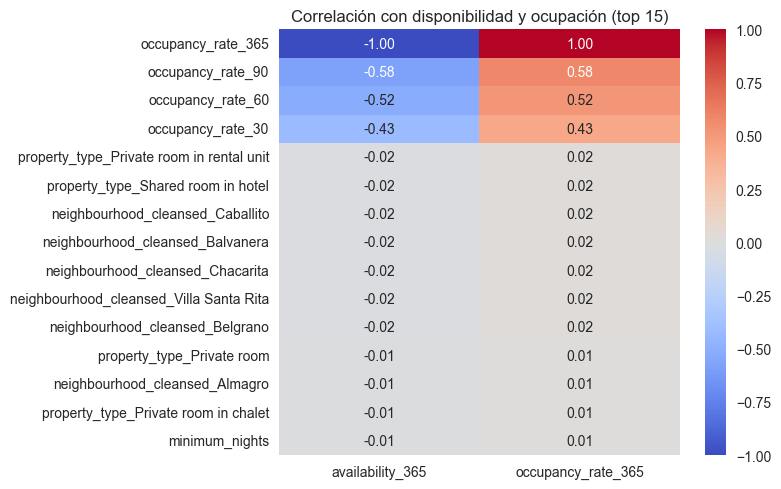

availability_365  \
occupancy_rate_365                                  -1.0000   
occupancy_rate_90                                   -0.5818   
occupancy_rate_60                                   -0.5210   
occupancy_rate_30                                   -0.4274   
property_type_Private room in rental unit           -0.0227   
property_type_Shared room in hotel                  -0.0207   
neighbourhood_cleansed_Caballito                    -0.0183   
neighbourhood_cleansed_Balvanera                    -0.0170   
neighbourhood_cleansed_Chacarita                    -0.0167   
neighbourhood_cleansed_Villa Santa Rita             -0.0162   
neighbourhood_cleansed_Belgrano                     -0.0157   
property_type_Private room                          -0.0144   
neighbourhood_cleansed_Almagro                      -0.0139   
property_type_Private room in chalet                -0.0135   
minimum_nights                                      -0.0135   

                                           occupancy_rate_365  
occupancy_rate_365                                     1.0000  
occupancy_rate_90                                      0.5818  
occupancy_rate_60                                      0.5210  
occupancy_rate_30                                      0.4274  
property_type_Private room in rental unit              0.0227  
property_type_Shared room in hotel                     0.0207  
neighbourhood_cleansed_Caballito                       0.0183  
neighbourhood_cleansed_Balvanera                       0.0170  
neighbourhood_cleansed_Chacarita                       0.0167  
neighbourhood_cleansed_Villa Santa Rita                0.0162  
neighbourhood_cleansed_Belgrano                        0.0157  
property_type_Private room                             0.0144  
neighbourhood_cleansed_Almagro                         0.0139  
property_type_Private room in chalet                   0.0135  
minimum_nights                                         0.0135

In [27]:
# Codificaci√≥n de categ√≥ricas para matriz de correlaci√≥n orientada a disponibilidad
availability_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
base_columns = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
                'number_of_reviews', 'reviews_per_month', 'price']

corr_base = df_train[base_columns + availability_cols].copy()

for horizon in [30, 60, 90, 365]:
    rate_col = f'occupancy_rate_{horizon}'
    if rate_col not in df_train.columns:
        df_train[rate_col] = 1 - (df_train[f'availability_{horizon}'] / horizon)
    corr_base[rate_col] = df_train[rate_col]

binary_map = {'yes': 1, 'no': 0}
for col in ['host_is_superhost', 'instant_bookable']:
    corr_base[f'{col}_flag'] = df_train[col].map(binary_map)

categorical_for_corr = ['room_type', 'property_type', 'neighbourhood_cleansed']
corr_encoded = pd.get_dummies(
    pd.concat([corr_base, df_train[categorical_for_corr]], axis=1),
    columns=categorical_for_corr,
    drop_first=True
)

corr_matrix = corr_encoded.corr(numeric_only=True)
target_corr = corr_matrix[['availability_365', 'occupancy_rate_365']].sort_values(
    by='occupancy_rate_365', ascending=False
)

top_features = target_corr.head(15).index
sns.heatmap(
    corr_matrix.loc[top_features, ['availability_365', 'occupancy_rate_365']],
    annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Correlaci√≥n con disponibilidad y ocupaci√≥n (top 15)')
plt.tight_layout()
plt.show()

target_corr.head(15)


## 4. Disponibilidad y objetivo de ocupaci√≥n


In [28]:
# C√°lculo de tasas de ocupaci√≥n a partir de la disponibilidad
availability_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
occupancy_df = df_train[availability_cols].copy()

for horizon in [30, 60, 90, 365]:
    rate_col = f'occupancy_rate_{horizon}'
    df_train[rate_col] = 1 - (df_train[f'availability_{horizon}'] / horizon)
    occupancy_df[rate_col] = df_train[rate_col]

occupancy_summary = occupancy_df[[f'occupancy_rate_{h}' for h in [30, 60, 90, 365]]].describe().T
print(occupancy_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# Target multiclase basado en la tasa anual
bins = [0.0, 0.4, 0.7, 1.01]
labels = ['low', 'mid', 'high']
df_train['occupancy_level'] = pd.cut(
    df_train['occupancy_rate_365'].clip(lower=0, upper=1),
    bins=bins, labels=labels, right=False, include_lowest=True
)

level_counts = df_train['occupancy_level'].value_counts(dropna=False).sort_index()
print('Distribuci√≥n de occupancy_level:')
print(level_counts)
print('Proporciones:')
print((level_counts / len(df_train)).round(3))


                     mean    std    min    25%    50%    75%    max
occupancy_rate_30  0.5103 0.4014 0.0000 0.0667 0.5000 1.0000 1.0000
occupancy_rate_60  0.4463 0.3804 0.0000 0.0500 0.3833 0.8500 1.0000
occupancy_rate_90  0.3941 0.3671 0.0000 0.0444 0.3000 0.6889 1.0000
occupancy_rate_365 0.4360 0.3459 0.0000 0.0904 0.3753 0.7589 1.0000
Distribuci√≥n de occupancy_level:
occupancy_level
low     14369
mid      5535
high     8280
Name: count, dtype: int64
Proporciones:
occupancy_level
low    0.5100
mid    0.1960
high   0.2940
Name: count, dtype: float64


In [29]:
# replica para df_test
occupancy_df = df_test[availability_cols].copy()

for horizon in [30, 60, 90, 365]:
    rate_col = f'occupancy_rate_{horizon}'
    df_test[rate_col] = 1 - (df_test[f'availability_{horizon}'] / horizon)
    occupancy_df[rate_col] = df_test[rate_col]

occupancy_summary = occupancy_df[[f'occupancy_rate_{h}' for h in [30, 60, 90, 365]]].describe().T
print(occupancy_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# Target multiclase basado en la tasa anual
bins = [0.0, 0.4, 0.7, 1.01]
labels = ['low', 'mid', 'high']
df_test['occupancy_level'] = pd.cut(
    df_test['occupancy_rate_365'].clip(lower=0, upper=1),
    bins=bins, labels=labels, right=False, include_lowest=True
)

level_counts = df_test['occupancy_level'].value_counts(dropna=False).sort_index()
print('Distribuci√≥n de occupancy_level:')
print(level_counts)
print('Proporciones:')
print((level_counts / len(df_test)).round(3))

                     mean    std    min    25%    50%    75%    max
occupancy_rate_30  0.5077 0.3992 0.0000 0.0667 0.5000 1.0000 1.0000
occupancy_rate_60  0.4434 0.3763 0.0000 0.0500 0.3833 0.8167 1.0000
occupancy_rate_90  0.3911 0.3616 0.0000 0.0444 0.3000 0.6889 1.0000
occupancy_rate_365 0.4256 0.3451 0.0000 0.0849 0.3452 0.7562 1.0000
Distribuci√≥n de occupancy_level:
occupancy_level
low     3678
mid     1299
high    2011
Name: count, dtype: int64
Proporciones:
occupancy_level
low    0.5260
mid    0.1860
high   0.2880
Name: count, dtype: float64


**Decisi√≥n:** Se utilizar√° la etiqueta multiclase `occupancy_level` para representar la ocupaci√≥n esperada (low/mid/high). El objetivo del modelado es predecir este nivel sin emplear variables de disponibilidad futuras.


## 5. Planteo del problema supervisado
Planteamos un problema de **clasificaci√≥n multiclase** donde la variable target es `occupancy_level`, construida a partir de la tasa de ocupaci√≥n anual estimada. Los niveles son:
- `high`: ocupaci√≥n >= 70%
- `mid`: ocupaci√≥n entre 40% y 70%
- `low`: ocupaci√≥n < 40%

El objetivo es anticipar la categor√≠a de ocupaci√≥n utilizando √∫nicamente atributos conocidos al momento de publicar un listing (sin recurrir a disponibilidades futuras). Se evaluar√° con m√©tricas como F1 macro, balanced accuracy y matrices de confusi√≥n para garantizar buen desempe√±o en las tres clases.

Las features consideradas combinan atributos de ubicaci√≥n (`latitude`, `longitude`, `neighbourhood_cleansed`), configuraci√≥n (`room_type`, `property_type`, `accommodates`, `bedrooms`), reputaci√≥n (`number_of_reviews`, `reviews_per_month`, `host_is_superhost`) y m√©tricas derivadas de la actividad del host (`host_tenure_days`, `reviews_per_year`, `days_since_last_review`).


**Definici√≥n del target:** `occupancy_level` surge de discretizar la tasa de ocupaci√≥n anual en tres bandas (`low`, `mid`, `high`) con umbrales (0.0, 0.4, 0.7, 1.0]. Esto permite capturar distintos perfiles de demanda y evita depender de la disponibilidad futura como feature. Registros sin informaci√≥n suficiente quedan con valor nulo y se descartan durante el split de entrenamiento.


## 6. Ingenier√≠a de features y preprocesamiento


### 6.1 Codificaci√≥n de amenities

Normalizamos la columna JSON de `amenities`, homogenizamos etiquetas y generamos indicadores binarios para las 20 amenidades m√°s frecuentes; estas columnas (`amenity_*`) ampl√≠an el set de features con informaci√≥n interpretable.


In [30]:
# Normalizamos la columna de amenities y generamos indicadores binarios
def normalize_amenities(value):
    if pd.isna(value):
        return []
    text = str(value).strip()
    if not text:
        return []
    candidate = text.replace('{', '[').replace('}', ']')
    try:
        parsed = json.loads(candidate)
    except json.JSONDecodeError:
        try:
            parsed = ast.literal_eval(candidate)
        except (ValueError, SyntaxError):
            parsed = [item.strip() for item in candidate.strip('[]').split(',')]
    normalized = []
    for item in parsed:
        token = str(item).strip().strip('"').strip("'")
        if token:
            normalized.append(token.lower())
    return sorted(set(normalized))

amenity_lists = df_train['amenities'].apply(normalize_amenities)
amenity_counts = amenity_lists.explode().value_counts()
top_k = 20
top_amenities = amenity_counts.head(top_k)

def amenity_to_col(amenity):
    slug = re.sub(r'[^a-z0-9]+', '_', amenity).strip('_')
    return f'amenity_{slug}' if slug else 'amenity_other'

amenities_feature_cols = []
for amenity in top_amenities.index:
    base_name = amenity_to_col(amenity)
    name = base_name
    suffix = 1
    while name in amenities_feature_cols:
        suffix += 1
        name = f"{base_name}_{suffix}"
    amenities_feature_cols.append(name)
    df_train[name] = amenity_lists.apply(lambda items, target=amenity: int(target in items))

top_amenities.to_frame(name='count').assign(percent=lambda data: data['count'] / len(df_train))


# Aplicar el mismo tratamiento de amenities en df_test

amenity_lists_test = df_test["amenities"].apply(normalize_amenities)

for amenity, col_name in zip(top_amenities.index, amenities_feature_cols):
    df_test[col_name] = amenity_lists_test.apply(lambda items, target=amenity: int(target in items))



### 6.1.2 Imputaciones

Diagnosticamos si existen precios en cero/negativos, los imputamos con la mediana positiva y preparamos una versi√≥n escalada (`price_imputed`) compatible con MinMaxScaler para usar en el pipeline.

In [31]:

# --- Helpers --------------------------------------------------------------------
NULL_TOKENS = {"", " ", "nan", "NaN", "null", "Null", "NULL", "none", "None", "NONE"}

def normalize_missing(series: pd.Series) -> pd.Series:
    mask = series.isna()
    mask |= series.astype(str).str.strip().isin(NULL_TOKENS)
    return series.mask(mask, pd.NA)

def to_numeric_price(series: pd.Series) -> pd.Series:
    cleaned = (
        series.astype(str)
              .str.replace(r"[^\d\.]", "", regex=True)
              .replace("", pd.NA)
    )
    return pd.to_numeric(cleaned, errors="coerce")

# --- Limpieza b√°sica (sin tocar los datos originales) ---------------------------
df_train["price_clean"] = to_numeric_price(normalize_missing(df_train["price"]))
df_test["price_clean"] = to_numeric_price(normalize_missing(df_test["price"]))

# --- Estad√≠sticos aprendidos SOLO con df_train ----------------------------------
global_price_median = df_train["price_clean"].median()

median_price_by_group = (
    df_train.groupby(["neighbourhood_cleansed", "room_type"])["price_clean"]
            .median()
            .dropna()
)

median_price_by_neighbourhood = (
    df_train.groupby("neighbourhood_cleansed")["price_clean"]
            .median()
            .dropna()
)

# --- Funci√≥n de imputaci√≥n reutilizable ----------------------------------------
def impute_price(df: pd.DataFrame) -> pd.Series:
    price = df["price_clean"].copy()

    group_key = list(zip(df["neighbourhood_cleansed"], df["room_type"]))
    price = price.fillna(
        pd.Series(group_key, index=df.index).map(median_price_by_group)
    )

    price = price.fillna(
        df["neighbourhood_cleansed"].map(median_price_by_neighbourhood)
    )

    price = price.fillna(global_price_median)
    return price

# --- Aplicaci√≥n en train y test -------------------------------------------------
df_train["price_imputed"] = impute_price(df_train)
df_test["price_imputed"] = impute_price(df_test)

print(f"Precio m√≠nimo tras imputaci√≥n (train): {df_train['price_imputed'].min():.2f}")
print(f"Precio m√≠nimo tras imputaci√≥n (test): {df_test['price_imputed'].min():.2f}")


Precio m√≠nimo tras imputaci√≥n (train): 260.00
Precio m√≠nimo tras imputaci√≥n (test): 600.00


In [32]:
# Feature engineering orientado a ocupaci√≥n (sin fuga de informaci√≥n)
reviews_per_month_fill_value = 0   # regla definida con train
reference_date = df_train["last_scraped"].max()

for frame in (df_train, df_test):
    frame["reviews_per_month_filled"] = frame["reviews_per_month"].fillna(reviews_per_month_fill_value)
    frame["host_since"] = pd.to_datetime(frame["host_since"], errors="coerce")
    frame["host_tenure_days"] = (reference_date - frame["host_since"]).dt.days
    frame["reviews_per_year"] = frame["number_of_reviews"] / (frame["host_tenure_days"] / 365)
    frame.loc[frame["host_tenure_days"] <= 0, "reviews_per_year"] = pd.NA

amenities_feature_cols = amenities_feature_cols if "amenities_feature_cols" in globals() else []

availability_like = [
    col for col in df_train.columns
    if col.startswith("availability_") or col.startswith("occupancy_rate_")
]

feature_cols = [
    col for col in df_train.columns
    if col not in availability_like
    and col != "occupancy_level"
    and col not in amenities_feature_cols
]
feature_cols = list(dict.fromkeys(feature_cols + amenities_feature_cols))

df_train = df_train[feature_cols + ["occupancy_level"]].copy()
df_test = df_test[feature_cols + ["occupancy_level"]].copy()
df_train.head()


id                         listing_url       scrape_id last_scraped  \
1  14222  https://www.airbnb.com/rooms/14222  20250129142212   2025-01-30   
2  15074  https://www.airbnb.com/rooms/15074  20250129142212   2025-01-30   
3  16695  https://www.airbnb.com/rooms/16695  20250129142212   2025-01-30   
4  20062  https://www.airbnb.com/rooms/20062  20250129142212   2025-01-30   
5  20429  https://www.airbnb.com/rooms/20429  20250129142212   2025-01-30   

            source                                              name  \
1      city scrape      RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES   
2  previous scrape                             ROOM WITH RIVER SIGHT   
3      city scrape                         DUPLEX LOFT 2 - SAN TELMO   
4      city scrape  PENTHOUSE /Terrace & pool /City views /2bedrooms   
5  previous scrape                 Hermoso  y acogedor departamento.   

                                         description  \
1  Beautiful cozy apartment in excellent location...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  Cozy apartment, bright, decorated from the sen...   

                               neighborhood_overview  \
1  Palermo is such a perfect place to explore the...   
2                                        not-defined   
3  San Telmo is one of the best neighborhoods in ...   
4                                        not-defined   
5  Historic neighborhood, 5 min walk from San Tel...   

                                         picture_url   host_id  \
1  https://a0.muscache.com/pictures/4695637/bbae8...  87710233   
2  https://a0.muscache.com/pictures/91166/c0fdcb4...     59338   
3  https://a0.muscache.com/pictures/619c33a9-0618...     64880   
4  https://a0.muscache.com/pictures/165679/2eb448...     75891   
5  https://a0.muscache.com/pictures/1a06e5c1-ce6b...     77065   

                                     host_url      host_name host_since  \
1  https://www.airbnb.com/users/show/87710233          Mar√≠a 2016-08-03   
2     https://www.airbnb.com/users/show/59338         Monica 2009-12-02   
3     https://www.airbnb.com/users/show/64880  Elbio Mariano 2009-12-21   
4     https://www.airbnb.com/users/show/75891         Sergio 2010-01-31   
5     https://www.airbnb.com/users/show/77065        Marcelo 2010-02-03   

             host_location                                         host_about  \
1  Buenos Aires, Argentina  Soy Organizadora de Eventos, me gusta relacion...   
2              not-defined                                        not-defined   
3  Buenos Aires, Argentina  I was borned in Tucuman, but I live in Buenos ...   
4  Buenos Aires, Argentina  Soy Sergio, vivo en Buenos Aires, y me gusta r...   
5  Buenos Aires, Argentina  Soy Marcelo, de Argentina, tengo 48 a√±os, soy ...   

  host_response_time host_response_rate host_acceptance_rate  \
1     within an hour               100%                 100%   
2                NaN                NaN                  NaN   
3     within an hour                95%                  94%   
4     within an hour               100%                  99%   
5                NaN                NaN                  NaN   

  host_is_superhost                                 host_thumbnail_url  \
1                no  https://a0.muscache.com/im/pictures/user/dc9d9...   
2                no  https://a0.muscache.com/defaults/user_pic-50x5...   
3               yes  https://a0.muscache.com/im/pictures/user/bdeda...   
4                no  https://a0.muscache.com/im/users/75891/profile...   
5                no  https://a0.muscache.com/im/pictures/user/02e58...   

                                    host_picture_url host_neighbourhood  \
1  https://a0.muscache.com/im/pictures/user/dc9d9...        not-defined   
2  https://a0.muscache.com/defaults/user_pic-225x...        not-defined   
3  https://a0.muscache.com/im/pictures/user/

In [33]:

df_test.head()

id                         listing_url       scrape_id last_scraped  \
0   11508  https://www.airbnb.com/rooms/11508  20250129142212   2025-01-30   
6   65446  https://www.airbnb.com/rooms/65446  20250129142212   2025-01-30   
7   66939  https://www.airbnb.com/rooms/66939  20250129142212   2025-01-30   
8   66940  https://www.airbnb.com/rooms/66940  20250129142212   2025-01-30   
10  68800  https://www.airbnb.com/rooms/68800  20250129142212   2025-01-30   

         source                                               name  \
0   city scrape                 Amazing Luxurious Apt-Palermo Soho   
6   city scrape               Premier Loft with Breathtaking Views   
7   city scrape              ‚òÖ Instaworthy Views, 20th Floor ‚òÖ Gym   
8   city scrape                                Pool View studio  ‚ù§   
10  city scrape  Recoleta great penthouse  w/private terrace &g...   

                                          description  \
0   LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...   
6   Amazing Loft/duplex apartment on the 25th floo...   
7   ‚Ä¢ 20th floor luxury condo<br />‚Ä¢ Floor-to-ceil...   
8   Modern studio apartment in Palermo Soho neighb...   
10  In the heart of the Recoleta District, the mos...   

                                neighborhood_overview  \
0   AREA: PALERMO SOHO<br /><br />Minutes walking ...   
6   If you‚Äôre an expat or vacationer spending time...   
7   Palermo Soho is THE place to be in Buenos Aire...   
8   Pool View apartment is ideally situated. This ...   
10  Recoleta is nice, stylish, safe and clean. It ...   

                                          picture_url host_id  \
0   https://a0.muscache.com/pictures/19357696/b1de...   42762   
6   https://a0.muscache.com/pictures/66295365/af6f...  319901   
7   https://a0.muscache.com/pictures/20e302c0-64a2...  319901   
8   https://a0.muscache.com/pictures/66416501/b073...  319901   
10  https://a0.muscache.com/pictures/7ee6e7fa-9689...  221405   

                                    host_url     host_name host_since  \
0    https://www.airbnb.com/users/show/42762       Candela 2009-10-01   
6   https://www.airbnb.com/users/show/319901  Ralf Dietmar 2010-12-15   
7   https://www.airbnb.com/users/show/319901  Ralf Dietmar 2010-12-15   
8   https://www.airbnb.com/users/show/319901  Ralf Dietmar 2010-12-15   
10  https://www.airbnb.com/users/show/221405        Ximena 2010-09-02   

              host_location  \
0              New York, NY   
6   Buenos Aires, Argentina   
7   Buenos Aires, Argentina   
8   Buenos Aires, Argentina   
10  Buenos Aires, Argentina   

                                           host_about host_response_time  \
0                                         not-defined     within an hour   
6   Although a German national, I have  actually r...     within an hour   
7   Although a German national, I have  actually r...     within an hour   
8   Although a German national, I have  actually r...     within an hour   
10  I am an absolute Buenos Aires lover, I really ...       within a day   

   host_response_rate host_acceptance_rate host_is_superhost  \
0                100%                  79%               yes   
6                100%                  98%               yes   
7                100%                  98%               yes   
8                100%                  98%               yes   
10               100%                  83%                no   

                                   host_thumbnail_url  \
0   https://a0.muscache.com/im/users/42762/profile...   
6   https://a0.muscache.com/im/pictures/user/2990f...   
7   https://a0.muscache.com/im/pictures/user/2990f...   
8   https://a0.muscache.com/im/pictures/user/2990f...   
10  https://a0.muscache.com/im/pictures/user/User-...   

                                     host_picture_url host_neighbourhood  \
0   https://a0.muscache.com/im/users/42762/profile...            Palermo   
6   https://a0.muscache.com/im/pictures/user/2990f...            

In [34]:
# Missing en traing
missing_abs = df_train.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df_train)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)

missing  percent
host_response_time              3342   0.1186
host_response_rate              3342   0.1186
estimated_revenue_l365d         2917   0.1035
price                           2917   0.1035
price_clean                     2917   0.1035
bathrooms                       2913   0.1034
beds                            2910   0.1033
host_acceptance_rate            2896   0.1028
description                      712   0.0253
bedrooms                         596   0.0211
bathrooms_text                    19   0.0007
review_scores_value                1   0.0000
review_scores_accuracy             1   0.0000
review_scores_rating               0   0.0000
days_since_last_review             0   0.0000
days_since_first_review            0   0.0000
has_reviews                        0   0.0000
was_evaluated_for_superhost        0   0.0000
review_scores_checkin              0   0.0000
reviews_per_month                  0   0.0000

In [35]:
# Missing en test
missing_abs = df_test.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df_test)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)

missing  percent
host_response_time             887   0.1269
host_response_rate             887   0.1269
host_acceptance_rate           816   0.1168
beds                           658   0.0942
estimated_revenue_l365d        657   0.0940
price_clean                    657   0.0940
price                          657   0.0940
bathrooms                      657   0.0940
description                    166   0.0238
bedrooms                       131   0.0187
reviews_per_year                 6   0.0009
host_tenure_days                 6   0.0009
host_has_profile_pic             6   0.0009
host_verifications               6   0.0009
host_total_listings_count        6   0.0009
host_listings_count              6   0.0009
host_picture_url                 6   0.0009
host_identity_verified           6   0.0009
host_thumbnail_url               6   0.0009
host_since                       6   0.0009

In [36]:
print("bathrooms_text" in df_train.columns)
print(sorted(df_train.columns))

True
['accommodates', 'amenities', 'amenity_air_conditioning', 'amenity_bed_linens', 'amenity_bidet', 'amenity_cooking_basics', 'amenity_dedicated_workspace', 'amenity_dishes_and_silverware', 'amenity_elevator', 'amenity_essentials', 'amenity_extra_pillows_and_blankets', 'amenity_hair_dryer', 'amenity_hangers', 'amenity_hot_water', 'amenity_hot_water_kettle', 'amenity_iron', 'amenity_kitchen', 'amenity_microwave', 'amenity_refrigerator', 'amenity_room_darkening_shades', 'amenity_tv', 'amenity_wifi', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'days_since_first_review', 'days_since_last_review', 'description', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'has_availability', 'has_reviews', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_ident

### Tratamiento previo a la imputaci√≥n
Convertimos columnas categ√≥ricas y otros campos problem√°ticos en representaciones num√©ricas para evitar fugas de informaci√≥n: limpieza de porcentajes, codificaci√≥n booleana, ordinal para `host_response_time`, longitudes de textos y one-hot para categor√≠as.

### Imputaci√≥n MICE
Con las variables ya num√©ricas alineamos `df_train` y `df_test`, descartamos features sin observaciones y aplicamos `IterativeImputer` (MICE) entrenado solo con `df_train` para completar los faltantes en ambos conjuntos.

In [37]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

# 1) Guardar target para no perderlo durante la depuraci√≥n
target_train = df_train['occupancy_level'].copy()
target_test = (
    df_test['occupancy_level'].copy()
    if 'occupancy_level' in df_test.columns
    else pd.Series(index=df_test.index, dtype=target_train.dtype)
)

# 2) Definiciones de columnas y helpers
percent_cols = ['host_response_rate', 'host_acceptance_rate']
boolean_cols = [
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'instant_bookable', 'has_availability'
]
category_cols = ['room_type', 'property_type', 'neighbourhood_cleansed']
ordinal_col = 'host_response_time'
numeric_from_text = {
    'description': 'description_length',
    'host_about': 'host_about_length',
    'neighborhood_overview': 'neighborhood_overview_length',
}
boolean_map = {'t': 1, 'f': 0, 'yes': 1, 'no': 0, True: 1, False: 0}
percent_stripper = re.compile(r'[^\d.]+')

def clean_percent(series: pd.Series) -> pd.Series:
    stripped = (
        series.astype(str)
              .str.replace(percent_stripper, '', regex=True)
              .replace('', np.nan)
    )
    return pd.to_numeric(stripped, errors='coerce') / 100.0

def text_length(series: pd.Series) -> pd.Series:
    return series.fillna('').astype(str).str.strip().str.len()

# 3) Conversi√≥n directa (independiente) en train y test
for name in ('df_train', 'df_test'):
    frame = df_train if name == 'df_train' else df_test

    for col in percent_cols:
        if col in frame.columns:
            frame[col] = clean_percent(frame[col])

    for col in boolean_cols:
        if col in frame.columns:
            frame[col] = frame[col].map(boolean_map)

    if ordinal_col in frame.columns:
        normalized = (
            frame[ordinal_col]
                .astype(str)
                .str.strip()
                .str.lower()
                .replace({'nan': np.nan, '': np.nan})
        )
        frame[ordinal_col] = normalized

    text_new_cols = {}
    drop_text_cols = []
    for col, length_col in numeric_from_text.items():
        if col in frame.columns:
            text_new_cols[length_col] = text_length(frame[col])
            text_new_cols[f'{col}_missing'] = frame[col].isna().astype('int8')
            drop_text_cols.append(col)
    if text_new_cols:
        new_text_df = pd.DataFrame(text_new_cols, index=frame.index)
        frame.drop(columns=drop_text_cols, inplace=True)
        frame[new_text_df.columns] = new_text_df

    if 'bathrooms_text' in frame.columns:
        cleaned = (
            frame['bathrooms_text']
            .astype(str)
            .str.lower()
            .str.replace('half-bath', '0.5 bath', regex=False)
            .str.replace('shared half-bath', '0.5 bath', regex=False)
        )
        frame['bathrooms_text'] = pd.to_numeric(
            cleaned.str.extract(r'(\d+(?:\.\d+)?)')[0],
            errors='coerce'
        )

    if name == 'df_train':
        df_train = frame
    else:
        df_test = frame

# 4) Ordinal encoder (fit en train, transform en test)
if ordinal_col in df_train.columns:
    ordinal_encoder = OrdinalEncoder(
        categories=[['within an hour', 'within a few hours', 'within a day', 'a few days or more']],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan,
        dtype=float,
    )
    df_train[[ordinal_col]] = ordinal_encoder.fit_transform(df_train[[ordinal_col]])
    df_test[[ordinal_col]] = ordinal_encoder.transform(df_test[[ordinal_col]])

# 5) OneHotEncoder para columnas categ√≥ricas/booleanas restantes
ohe_cols = [col for col in category_cols + boolean_cols if col in df_train.columns]

if ohe_cols:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary')
    ohe_train = ohe.fit_transform(df_train[ohe_cols])
    ohe_test = ohe.transform(df_test[ohe_cols])
    ohe_cols_names = ohe.get_feature_names_out(ohe_cols)

    ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_cols_names, index=df_train.index)
    ohe_test_df = pd.DataFrame(ohe_test, columns=ohe_cols_names, index=df_test.index)

    df_train = pd.concat([df_train.drop(columns=ohe_cols), ohe_train_df], axis=1)
    df_test = pd.concat([df_test.drop(columns=ohe_cols), ohe_test_df], axis=1)

# 6) Quedarse solo con num√©ricas comunes antes de MICE
df_train = df_train.select_dtypes(include='number')
df_test = df_test.select_dtypes(include='number')
common_cols = df_train.columns.intersection(df_test.columns)

if common_cols.empty:
    raise ValueError('No hay columnas num√©ricas comunes entre df_train y df_test para MICE.')

numeric_cols = list(common_cols)
df_train = df_train[numeric_cols].copy()
df_test = df_test[numeric_cols].copy()

# Eliminar columnas sin observaciones en el set de entrenamiento
non_empty_cols = [col for col in numeric_cols if df_train[col].notna().any()]
dropped_for_mice = sorted(set(numeric_cols) - set(non_empty_cols))
if dropped_for_mice:
    print(f'Se descartan columnas sin datos en train para MICE: {dropped_for_mice}')

numeric_cols = non_empty_cols

df_train = df_train[numeric_cols]
df_test = df_test[numeric_cols]

# 7) Imputaci√≥n MICE
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

mice_cols = [
    col for col in numeric_cols
    if df_train[col].isna().any() or df_test[col].isna().any()
]

if mice_cols:
    int_like_cols = []
    for col in mice_cols:
        series = df_train[col].dropna()
        if not series.empty and np.allclose(series.round(), series):
            int_like_cols.append(col)

    imputer = IterativeImputer(random_state=42, max_iter=20, sample_posterior=False, tol=1e-3)
    imputer.fit(df_train[numeric_cols])

    train_imputed_df = pd.DataFrame(
        imputer.transform(df_train[numeric_cols]),
        columns=numeric_cols,
        index=df_train.index,
    )
    test_imputed_df = pd.DataFrame(
        imputer.transform(df_test[numeric_cols]),
        columns=numeric_cols,
        index=df_test.index,
    )

    df_train.loc[:, numeric_cols] = train_imputed_df
    df_test.loc[:, numeric_cols] = test_imputed_df

    for col in int_like_cols:
        df_train[col] = np.round(df_train[col]).astype('Int64')
        df_test[col] = np.round(df_test[col]).astype('Int64')

    print(f'Columnas imputadas con MICE: {mice_cols}')
else:
    print('No hab√≠a valores faltantes en columnas num√©ricas.')

# 8) Restaurar el target
df_train['occupancy_level'] = target_train
df_test['occupancy_level'] = target_test



/Users/spardo/projects/esp-ai/analisis_datos/tp_ok/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Columnas imputadas con MICE: ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'estimated_revenue_l365d', 'review_scores_accuracy', 'review_scores_value', 'price_clean', 'host_tenure_days', 'reviews_per_year']


#### Verificaci√≥n de nulos

Verificamos train y test luego de aplicar Encodign y MICE


In [42]:
# Missing en train
missing_abs = df_train.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df_train)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)

missing  percent
id                                                    0   0.0000
property_type_Entire townhouse                        0   0.0000
property_type_Room in boutique hotel                  0   0.0000
property_type_Room in hostel                          0   0.0000
property_type_Room in hotel                           0   0.0000
property_type_Room in serviced apartment              0   0.0000
property_type_Shared room in bed and breakfast        0   0.0000
property_type_Shared room in casa particular          0   0.0000
property_type_Shared room in condo                    0   0.0000
property_type_Shared room in guesthouse               0   0.0000
property_type_Shared room in home                     0   0.0000
property_type_Shared room in hostel                   0   0.0000
property_type_Shared room in hotel                    0   0.0000
property_type_Shared room in rental unit              0   0.0000
property_type_Shared room in townhouse                0   0.0000
property_type_Shared room in villa                    0   0.0000
property_type_Tiny home                               0   0.0000
property_type_Tower                                   0   0.0000
neighbourhood_cleansed_Agronomia                      0   0.0000
neighbourhood_cleansed_Almagro                        0   0.0000

In [39]:
# Missing en test
missing_abs = df_test.isna().sum().sort_values(ascending=False)
missing_pct = (missing_abs / len(df_test)).round(4)
missing_table = pd.DataFrame({'missing': missing_abs, 'percent': missing_pct})
missing_table.head(20)

missing  percent
id                                                    0   0.0000
property_type_Entire townhouse                        0   0.0000
property_type_Room in boutique hotel                  0   0.0000
property_type_Room in hostel                          0   0.0000
property_type_Room in hotel                           0   0.0000
property_type_Room in serviced apartment              0   0.0000
property_type_Shared room in bed and breakfast        0   0.0000
property_type_Shared room in casa particular          0   0.0000
property_type_Shared room in condo                    0   0.0000
property_type_Shared room in guesthouse               0   0.0000
property_type_Shared room in home                     0   0.0000
property_type_Shared room in hostel                   0   0.0000
property_type_Shared room in hotel                    0   0.0000
property_type_Shared room in rental unit              0   0.0000
property_type_Shared room in townhouse                0   0.0000
property_type_Shared room in villa                    0   0.0000
property_type_Tiny home                               0   0.0000
property_type_Tower                                   0   0.0000
neighbourhood_cleansed_Agronomia                      0   0.0000
neighbourhood_cleansed_Almagro                        0   0.0000

### 6.2 Correlaci√≥n lineal de features

Convertimos el dataset de modelado a una versi√≥n num√©rica (incluyendo el target codificado) para inspeccionar la matriz de correlaci√≥n y priorizar las variables con mayor v√≠nculo lineal con `occupancy_level`.


No hay features con |correlaci√≥n| >= 0.3


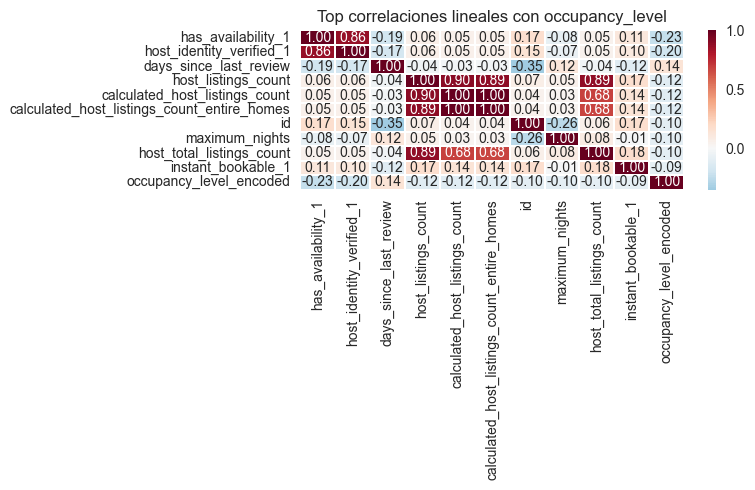

correlation_with_target
has_availability_1                                           -0.2320
host_identity_verified_1                                     -0.1980
days_since_last_review                                        0.1380
host_listings_count                                          -0.1190
calculated_host_listings_count                               -0.1180
calculated_host_listings_count_entire_homes                  -0.1160
id                                                           -0.1020
maximum_nights                                               -0.0990
host_total_listings_count                                    -0.0950
instant_bookable_1                                           -0.0930
amenity_dedicated_workspace                                  -0.0880
number_of_reviews_l30d                                       -0.0800
reviews_per_month_filled                                     -0.0740
reviews_per_month                                            -0.0740
host_response_time                                            0.0690
accommodates                                                 -0.0660
host_acceptance_rate                                         -0.0640
number_of_reviews_ltm                                        -0.0630
host_is_superhost_1                                          -0.0620
maximum_maximum_nights                                       -0.0600

In [43]:
# Matriz de correlaci√≥n (features num√©ricos + target codificado)
correlation_df = df_train.dropna(subset=['occupancy_level']).copy()
target_mapping = {'low': 0, 'mid': 1, 'high': 2}
target_encoded = correlation_df['occupancy_level'].map(target_mapping)

feature_matrix = correlation_df.drop(columns=['occupancy_level'])

binary_map = {'yes': 1, 'no': 0}
binary_cols = [col for col in ['host_is_superhost', 'instant_bookable'] if col in feature_matrix.columns]
for col in binary_cols:
    feature_matrix[col] = feature_matrix[col].map(binary_map)

categorical_cols = feature_matrix.select_dtypes(include='object').columns
feature_matrix = pd.get_dummies(feature_matrix, columns=categorical_cols, drop_first=True)

corr_ready = feature_matrix.assign(occupancy_level_encoded=target_encoded)
corr_matrix = corr_ready.corr().round(3)

corr_with_target = corr_matrix['occupancy_level_encoded'].drop('occupancy_level_encoded').dropna().sort_values(key=lambda s: s.abs(), ascending=False)

top_n = min(20, len(corr_with_target))
threshold = 0.3
corr_filtered = corr_with_target[ corr_with_target.abs() >= threshold ]

if corr_filtered.empty:
    print(f'No hay features con |correlaci√≥n| >= {threshold}')
    top_features = corr_with_target.head(10).index.tolist()
else:
    top_features = corr_filtered.index.tolist()

plot_cols = top_features + ['occupancy_level_encoded']

sns.heatmap(corr_matrix.loc[plot_cols, plot_cols], annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=0.2)
plt.title('Top correlaciones lineales con occupancy_level')
plt.tight_layout()
plt.show()

corr_with_target.head(top_n).to_frame(name='correlation_with_target')



In [47]:
target_col = 'occupancy_level'

y = df_train[target_col]

print(f'Observaciones totales para modelado: {len(df_train)}')
print(f'Registros sin target: {y.isna().sum()} (ser√°n descartados antes del split)')


Observaciones totales para modelado: 28184
Registros sin target: 0 (ser√°n descartados antes del split)


## 7. Selecci√≥n y reducci√≥n de dimensionalidad


In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X_features = df_train.drop(columns=['occupancy_level'])
y_encoded = df_train['occupancy_level'].astype('category').cat.codes

k_features = min(20, X_features.shape[1])
selector = SelectKBest(score_func=mutual_info_classif, k=k_features)
selector.fit(X_features, y_encoded)

feature_scores = (
    pd.DataFrame({
        'feature': X_features.columns,
        'mutual_information': selector.scores_
    })
    .sort_values(by='mutual_information', ascending=False)
    .reset_index(drop=True)
)

selected_features = selector.get_support(indices=True)
selected_feature_names = X_features.columns[selected_features].tolist()

feature_scores.head(15)



feature  mutual_information
0                              host_tenure_days              0.1312
1                                         price              0.1153
2                                   price_clean              0.1108
3                                     bathrooms              0.0916
4                       estimated_revenue_l365d              0.0837
5                                 price_imputed              0.0817
6                             host_about_length              0.0587
7                            host_response_rate              0.0540
8                     host_total_listings_count              0.0536
9                calculated_host_listings_count              0.0500
10  calculated_host_listings_count_entire_homes              0.0476
11                          host_listings_count              0.0433
12                         host_acceptance_rate              0.0413
13                           has_availability_1              0.0395
14                       maximum_nights_avg_ntm              0.0339

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

pca = PCA().fit(X_scaled)
explained_variance = pd.DataFrame({
    'component': np.arange(1, pca.n_components_ + 1),
    'variance_ratio': pca.explained_variance_ratio_,
    'cumulative_variance': np.cumsum(pca.explained_variance_ratio_)
})

explained_variance.head(10)



component  variance_ratio  cumulative_variance
0          1          0.0746               0.0746
1          2          0.0269               0.1015
2          3          0.0250               0.1265
3          4          0.0217               0.1483
4          5          0.0210               0.1693
5          6          0.0196               0.1889
6          7          0.0180               0.2069
7          8          0.0166               0.2235
8          9          0.0162               0.2398
9         10          0.0143               0.2541

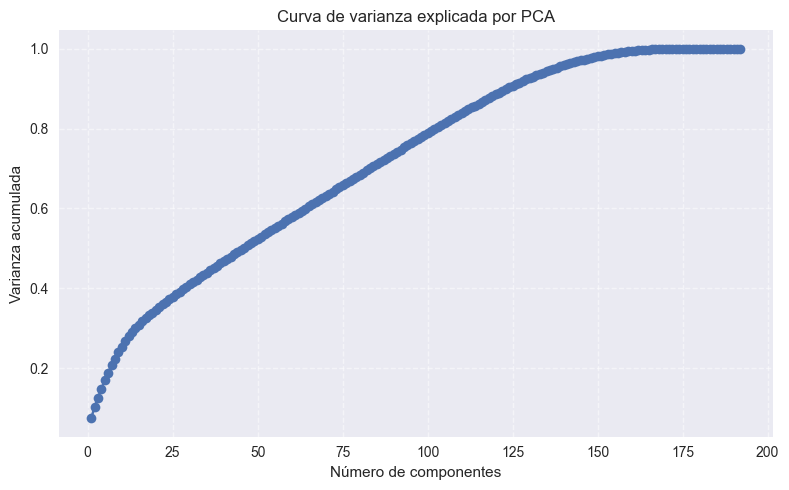

In [51]:
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(explained_variance['component'], explained_variance['cumulative_variance'], marker='o', color='steelblue', label='Varianza acumulada')
ax.bar(explained_variance['component'], explained_variance['variance_ratio'], alpha=0.3, color='orange', label='Varianza individual')
ax.axhline(0.8, color='red', linestyle='--', linewidth=1, label='80% de varianza')
ax.set_xlabel('N√∫mero de componentes')
ax.set_ylabel('Varianza')
ax.set_title('Varianza explicada por PCA')
ax.set_xticks(range(1, min(21, len(explained_variance) + 1)))
ax.set_ylim(0, 1.05)
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Interpretaci√≥n:** Con ~6 componentes se retiene alrededor del 80% de la varianza num√©rica, √∫til si se necesita compactar el espacio antes de entrenar clasificadores sensibles a la dimensionalidad (p. ej. regresi√≥n log√≠stica).


## 8. Pr√≥ximos pasos sugeridos
- Entrenar clasificadores multiclase (`LogisticRegression`, `RandomForestClassifier`, `XGBoost`) usando el pipeline de `preprocessor`.
- Medir F1 macro, balanced accuracy y analizar la matriz de confusi√≥n para los niveles `low/mid/high`.
- Ajustar umbrales o reglas de decisi√≥n seg√∫n la estrategia comercial (p. ej. priorizar recall de `high`).
- Incorporar nuevas variables disponibles al crear el anuncio (amenities, pol√≠ticas, texto) para mejorar el poder predictivo sin depender de disponibilidad futura.


- Entrenar un modelo base (p. ej. `RandomForestRegressor`, `GradientBoostingRegressor`) usando el pipeline de `preprocessor`.
- Validar con una m√©trica robusta (MAE) y comparar contra un baseline como la mediana.
- Explorar ingenier√≠a espec√≠fica del vecindario (densidad de listings, precio medio por zona) y disponibilidad.
- Evaluar estrategias de tuning (GridSearch/Optuna) y monitoreo de drift con `wandb`.
